In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Load data
Heart_failure = pd.read_csv("heart_failure.csv")
print(Heart_failure.head())
#print(Heart_failure.to_string())
print(Heart_failure.info())
print(Heart_failure.isnull())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [50]:
# Define the list of categorical columns to convert to numeric
df = pd.DataFrame(Heart_failure)
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',]
for column in columns_to_convert:
    df[column] = pd.factorize(df[column])[0]
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']+columns_to_convert

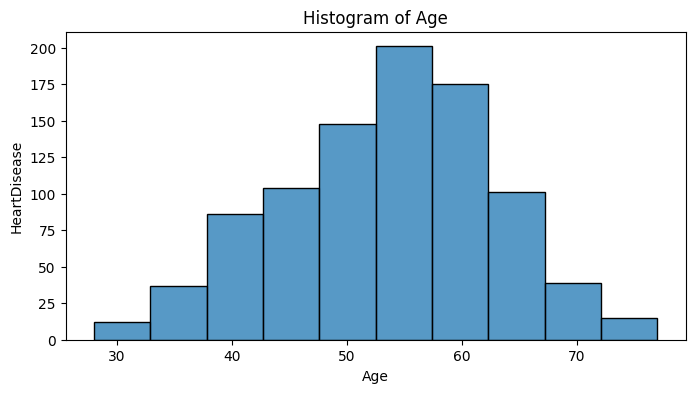

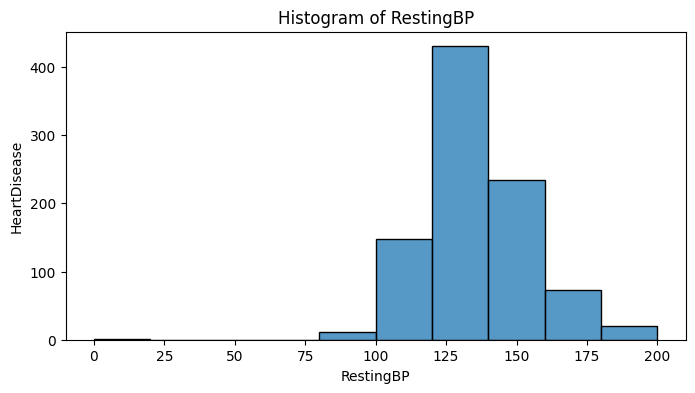

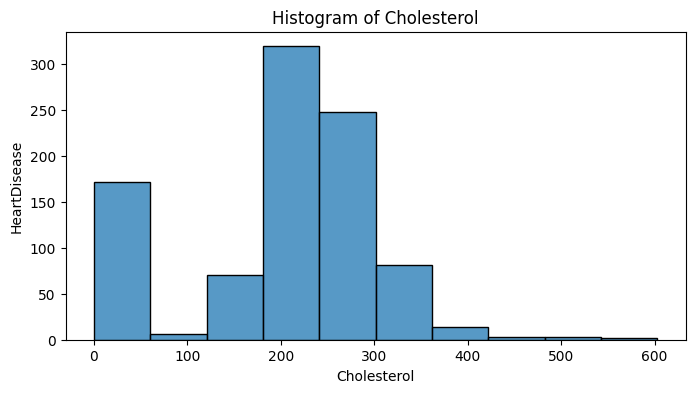

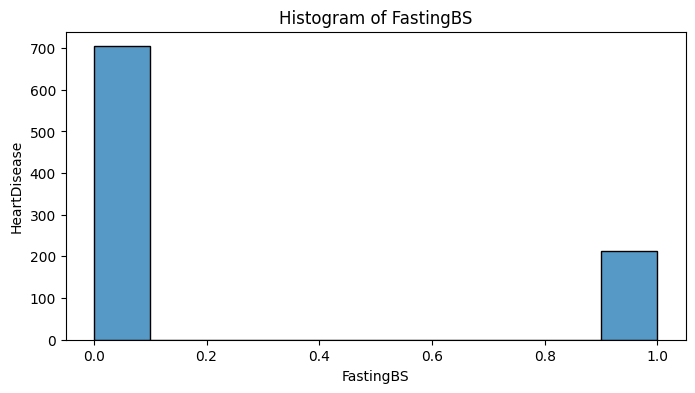

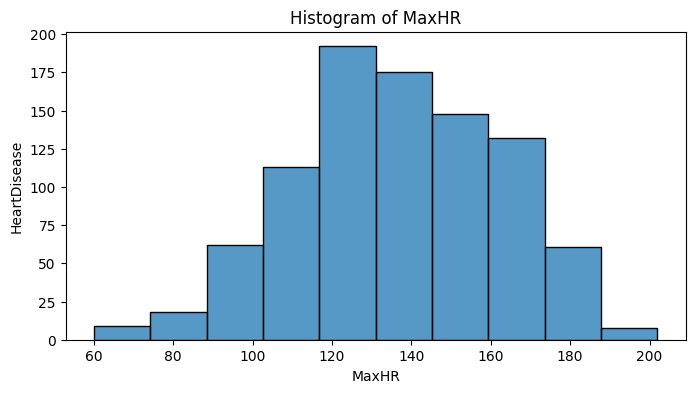

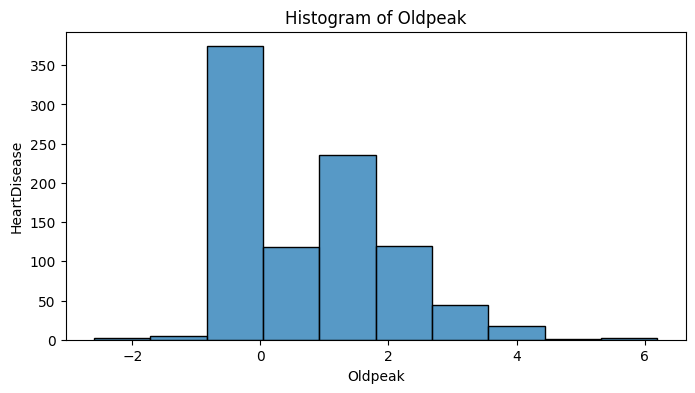

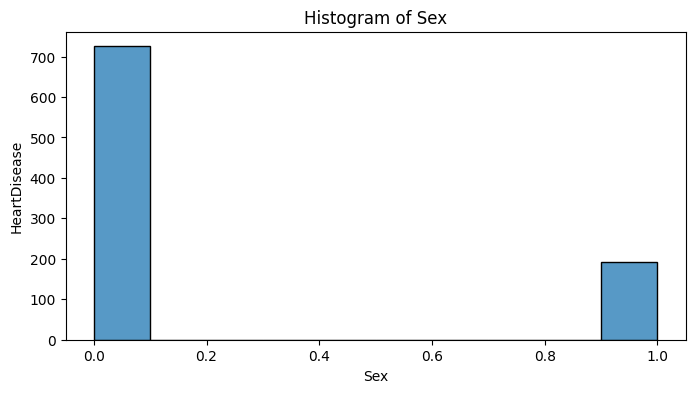

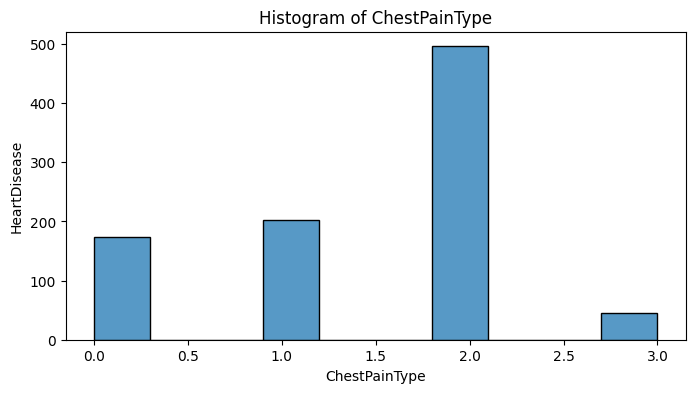

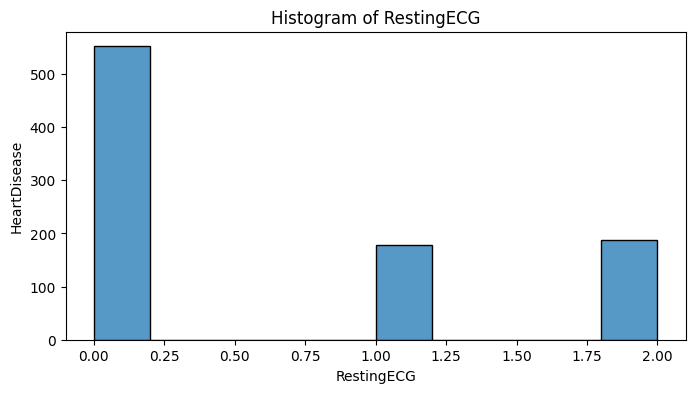

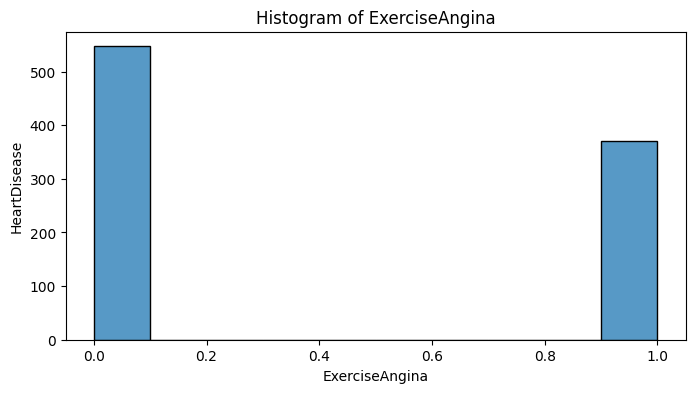

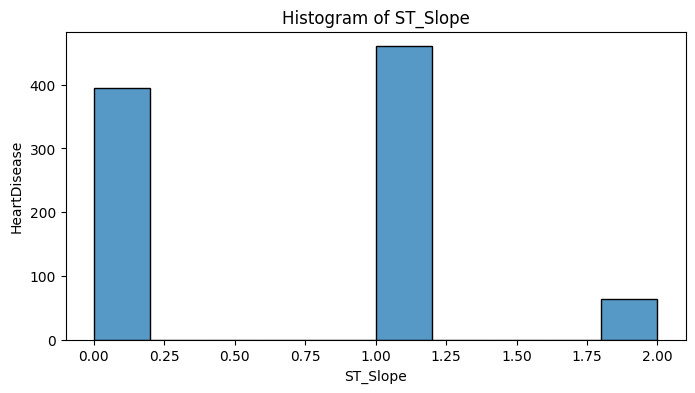

In [51]:
# Plot histograms
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=False, bins=10)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('HeartDisease')
    plt.show()

In [52]:
# Define the list of categorical columns to convert to numeric
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# Convert categorical columns to numeric using one-hot encoding
Heart_failure_encoded = pd.get_dummies(Heart_failure, columns=columns_to_convert)
# Print to check the result
print(Heart_failure_encoded.head())


   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...               True             False   
2  False   True              False  ...              False             False   
3   True  False               True  ...              False             False   
4  False   True              False  ...               True             False   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_

In [53]:
## Compute the correlation matrix
corr = Heart_failure_encoded.corr()

# Print the correlation matrix to ensure it is defined
print("Correlation Matrix:\n", corr)


Correlation Matrix:
                         Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP          0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol       -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS          0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR             -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak            0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease       0.282039   0.107589    -0.232741   0.267291 -0.400421   
Sex_F             -0.055750  -0.005133     0.200092  -0.120076  0.189186   
Sex_M              0.055750   0.005133    -0.200092   0.120076 -0.189186   
ChestPainType_ASY  0.166607   0.048824    -0.120531   0.131176 -0.354963   
ChestPainType_ATA -0.218165  -0.046153     0.150954  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.041348    -0.006634  -0.039249  0.1

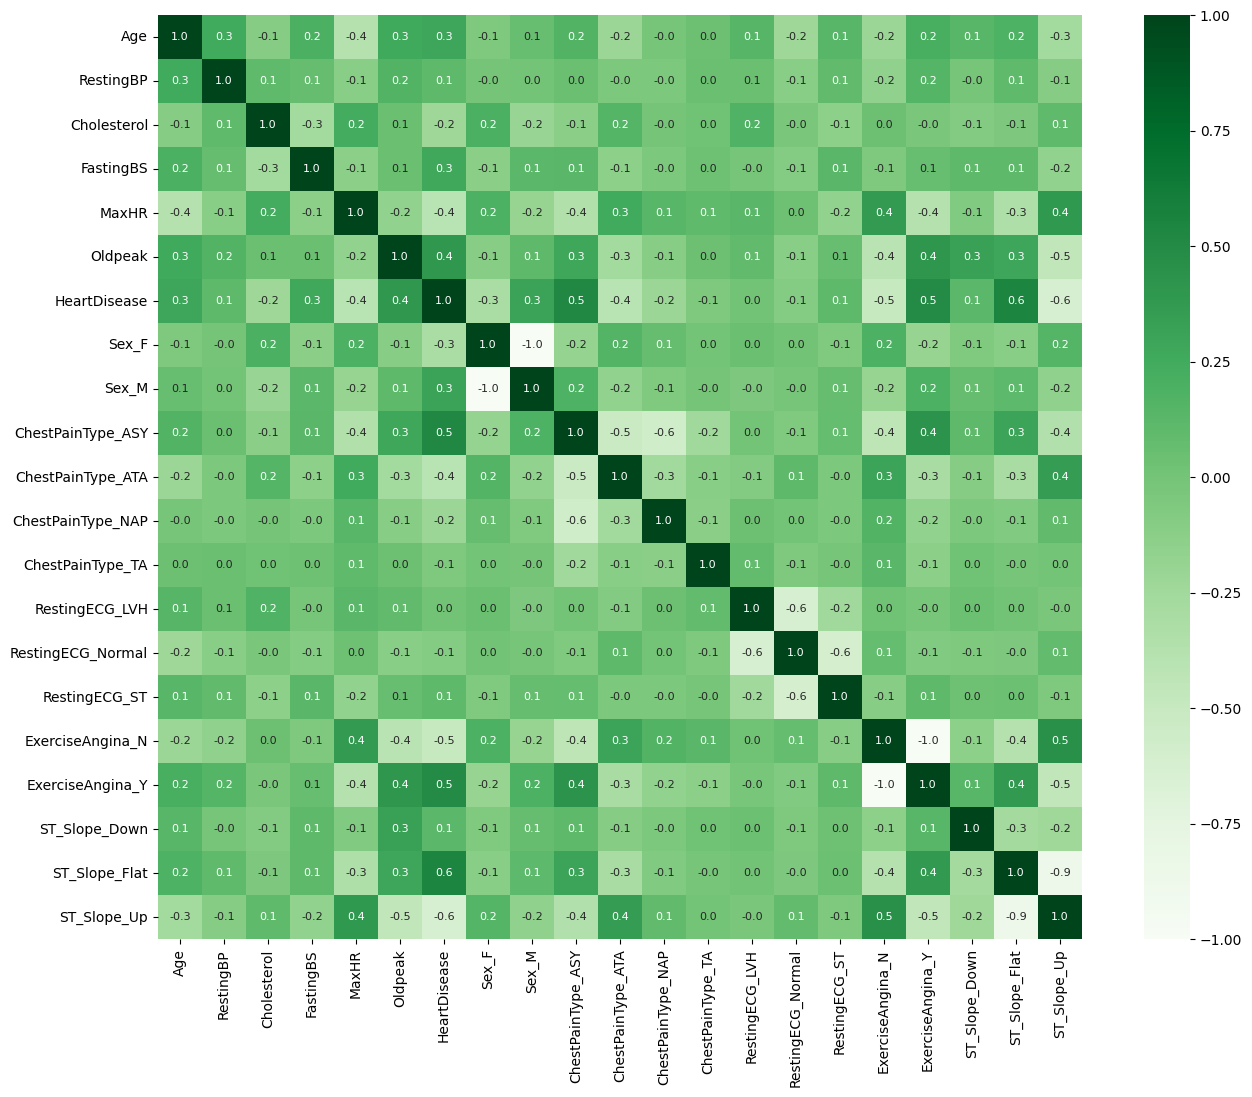

In [54]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Greens')
plt.show()


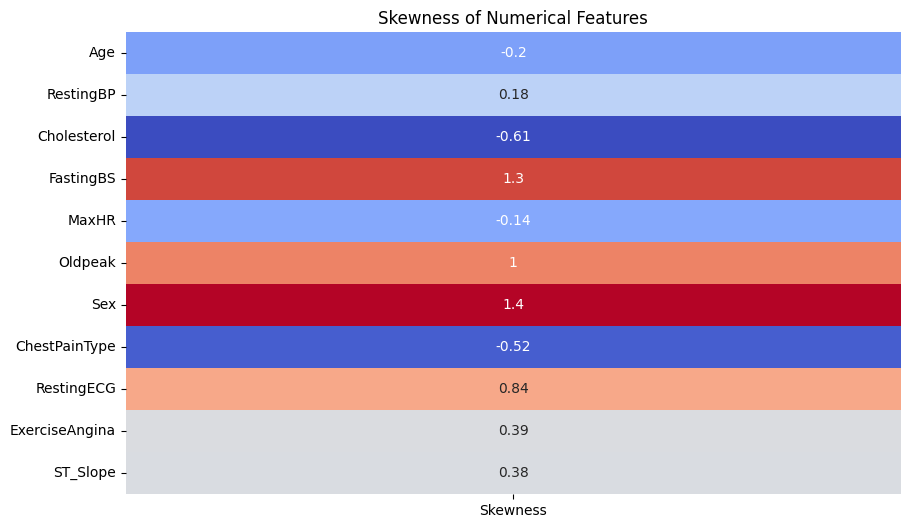

In [55]:
# Define the list of categorical columns to convert to numeric
df = pd.DataFrame(Heart_failure)
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',]
for column in columns_to_convert:
    df[column] = pd.factorize(df[column])[0]
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']+columns_to_convert
# Compute skewness of numerical features
skewness = df[numeric_features].skew()
skewness_df = pd.DataFrame(skewness, columns=['Skewness'])

# Visualize skewness using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(skewness_df, annot=True, cmap='coolwarm', cbar=False)
plt.title('Skewness of Numerical Features')
plt.show()

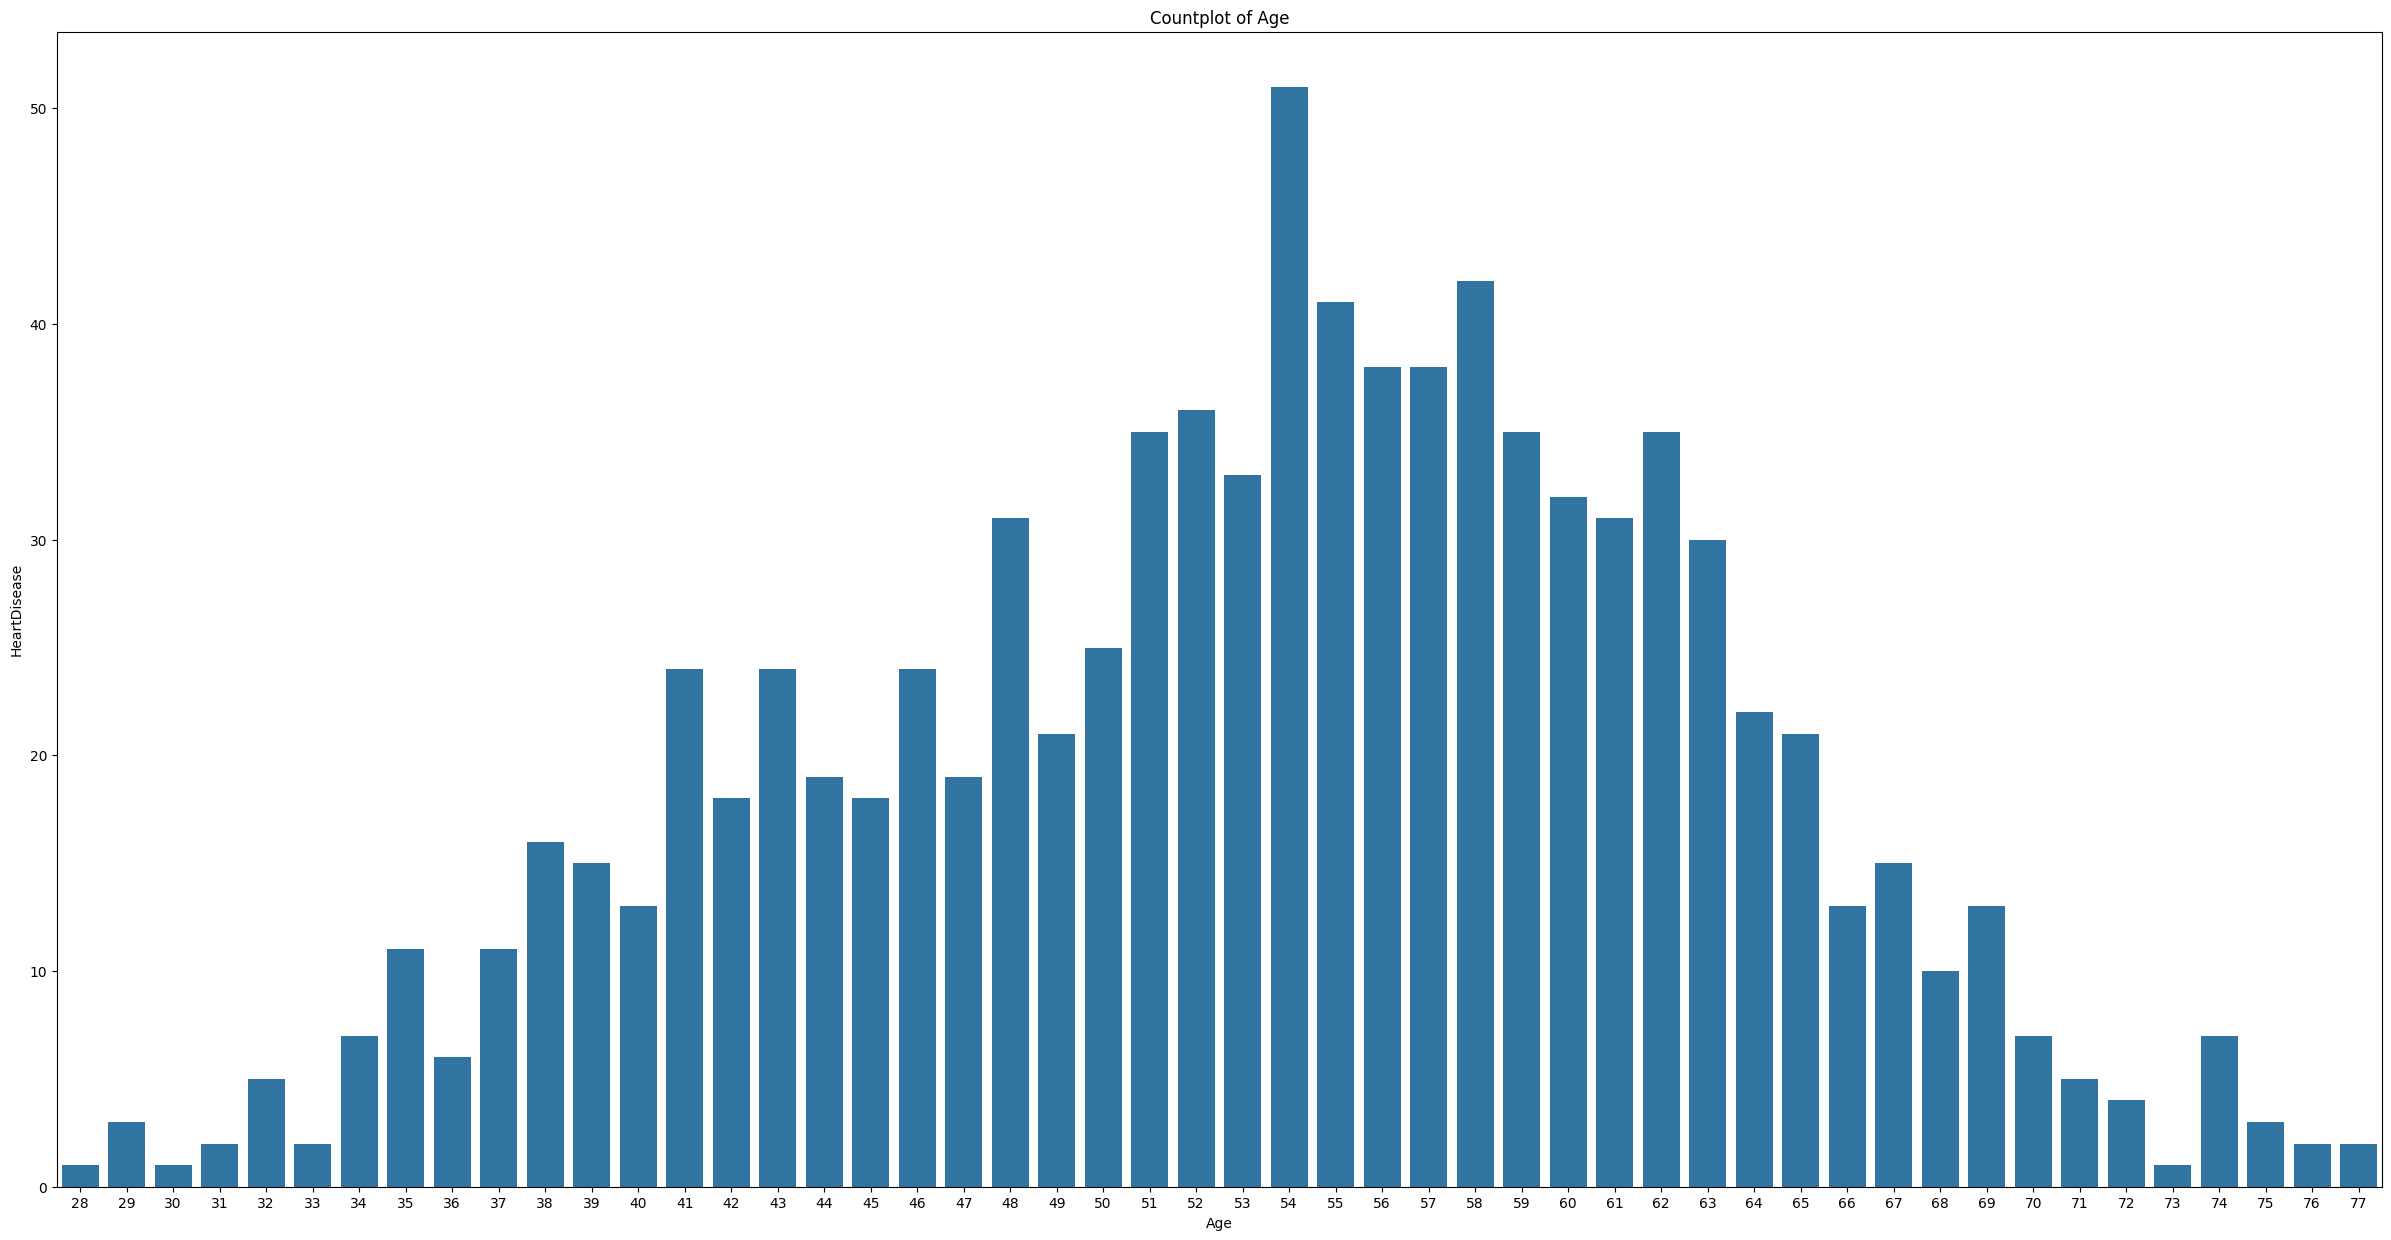

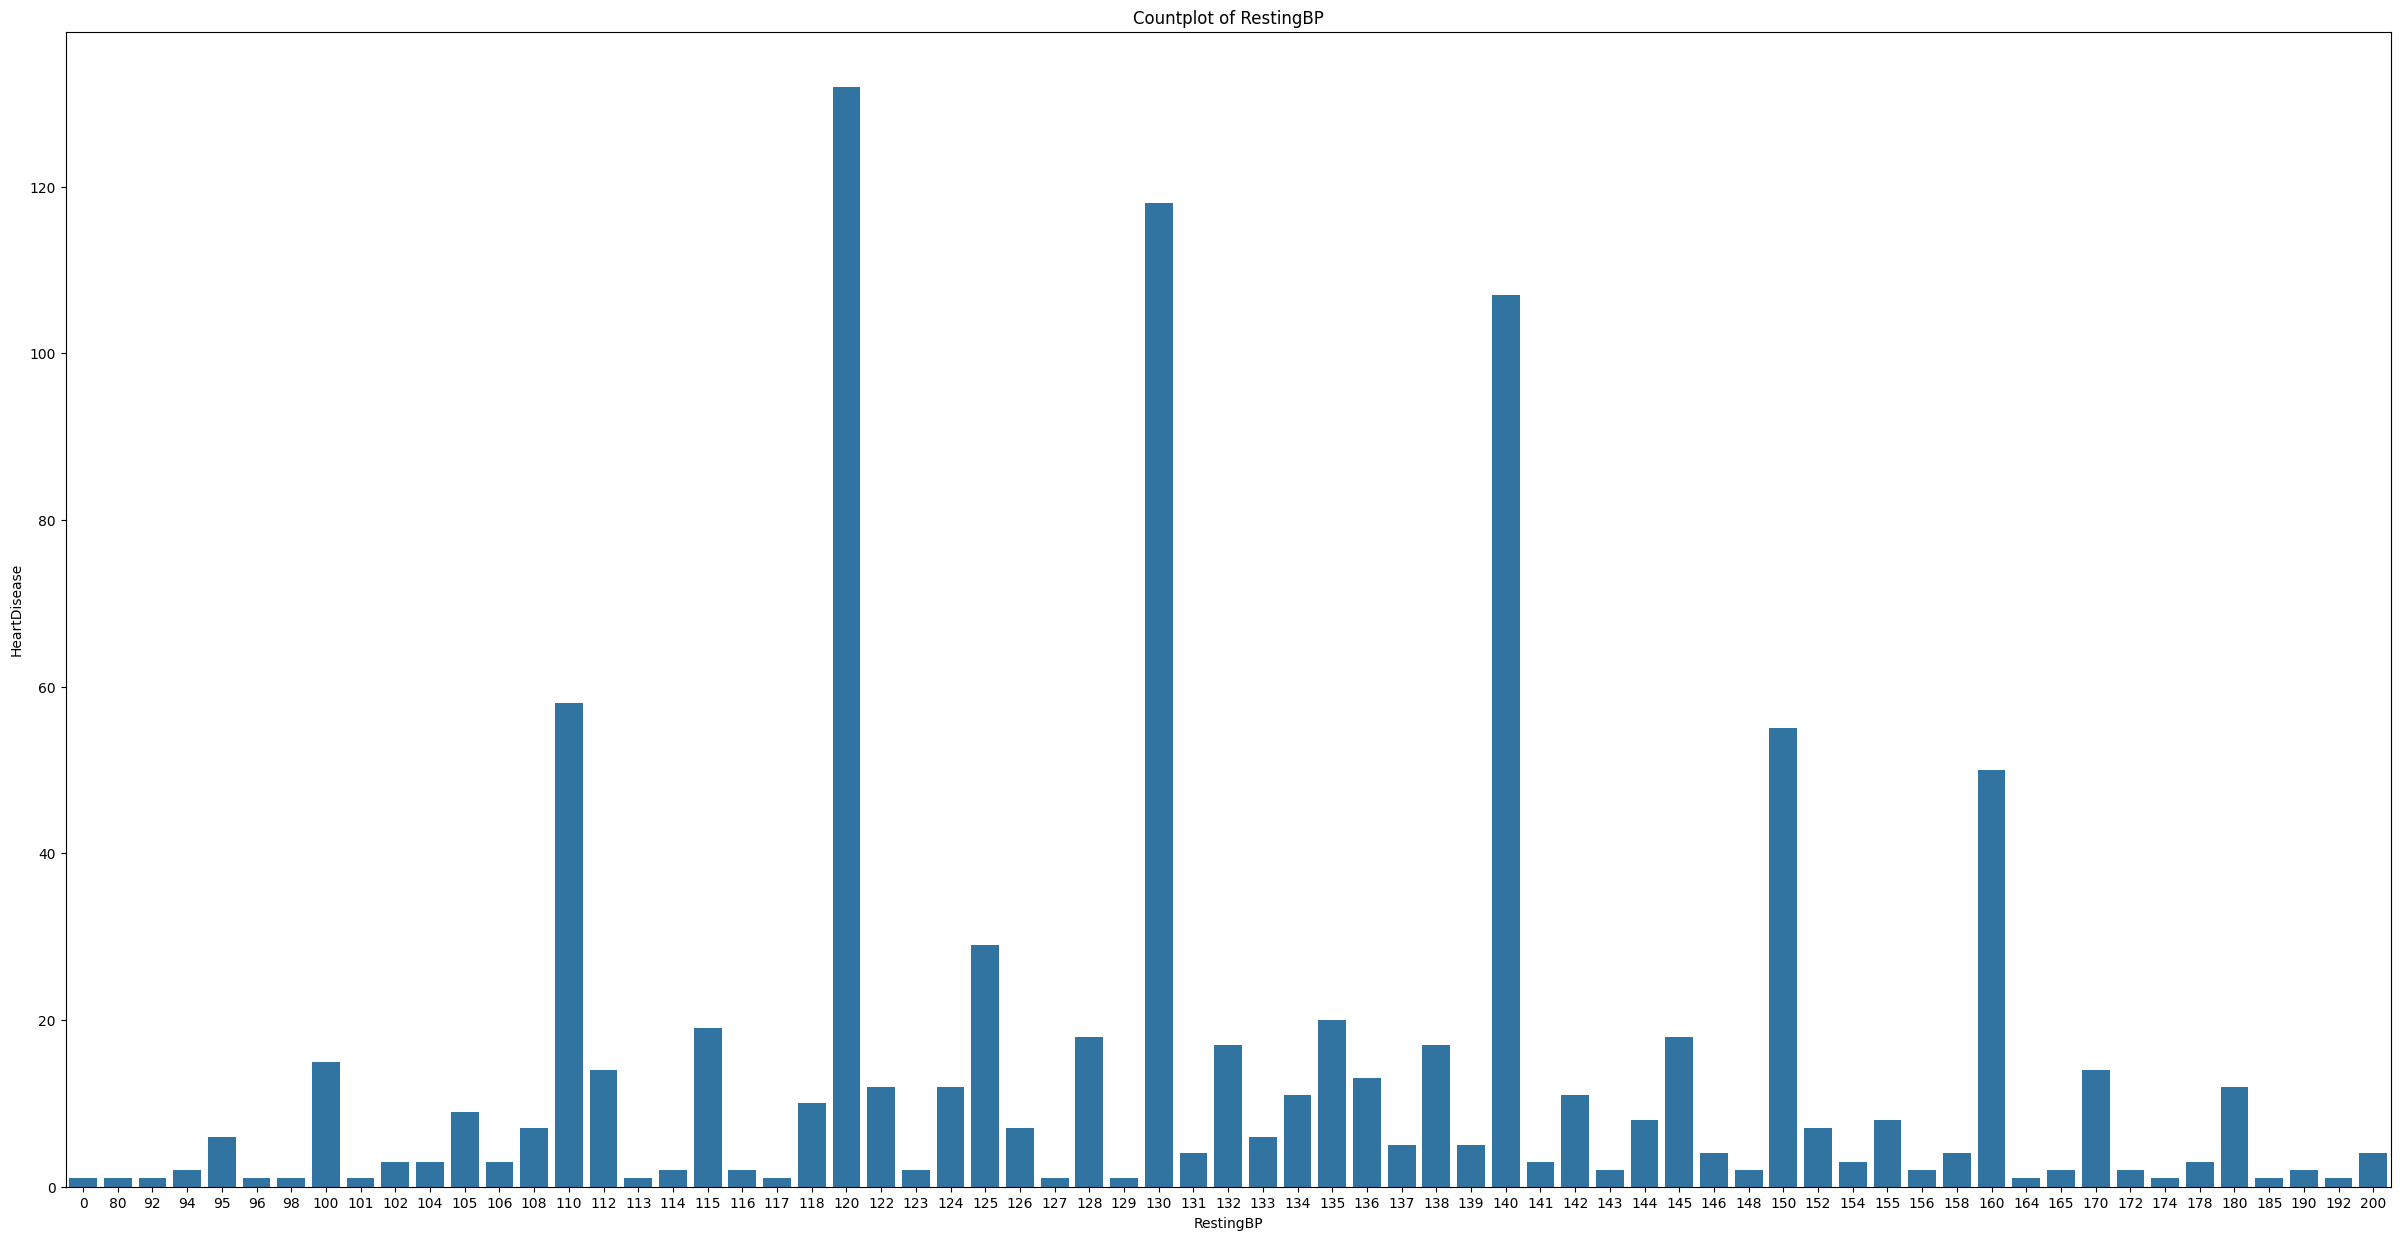

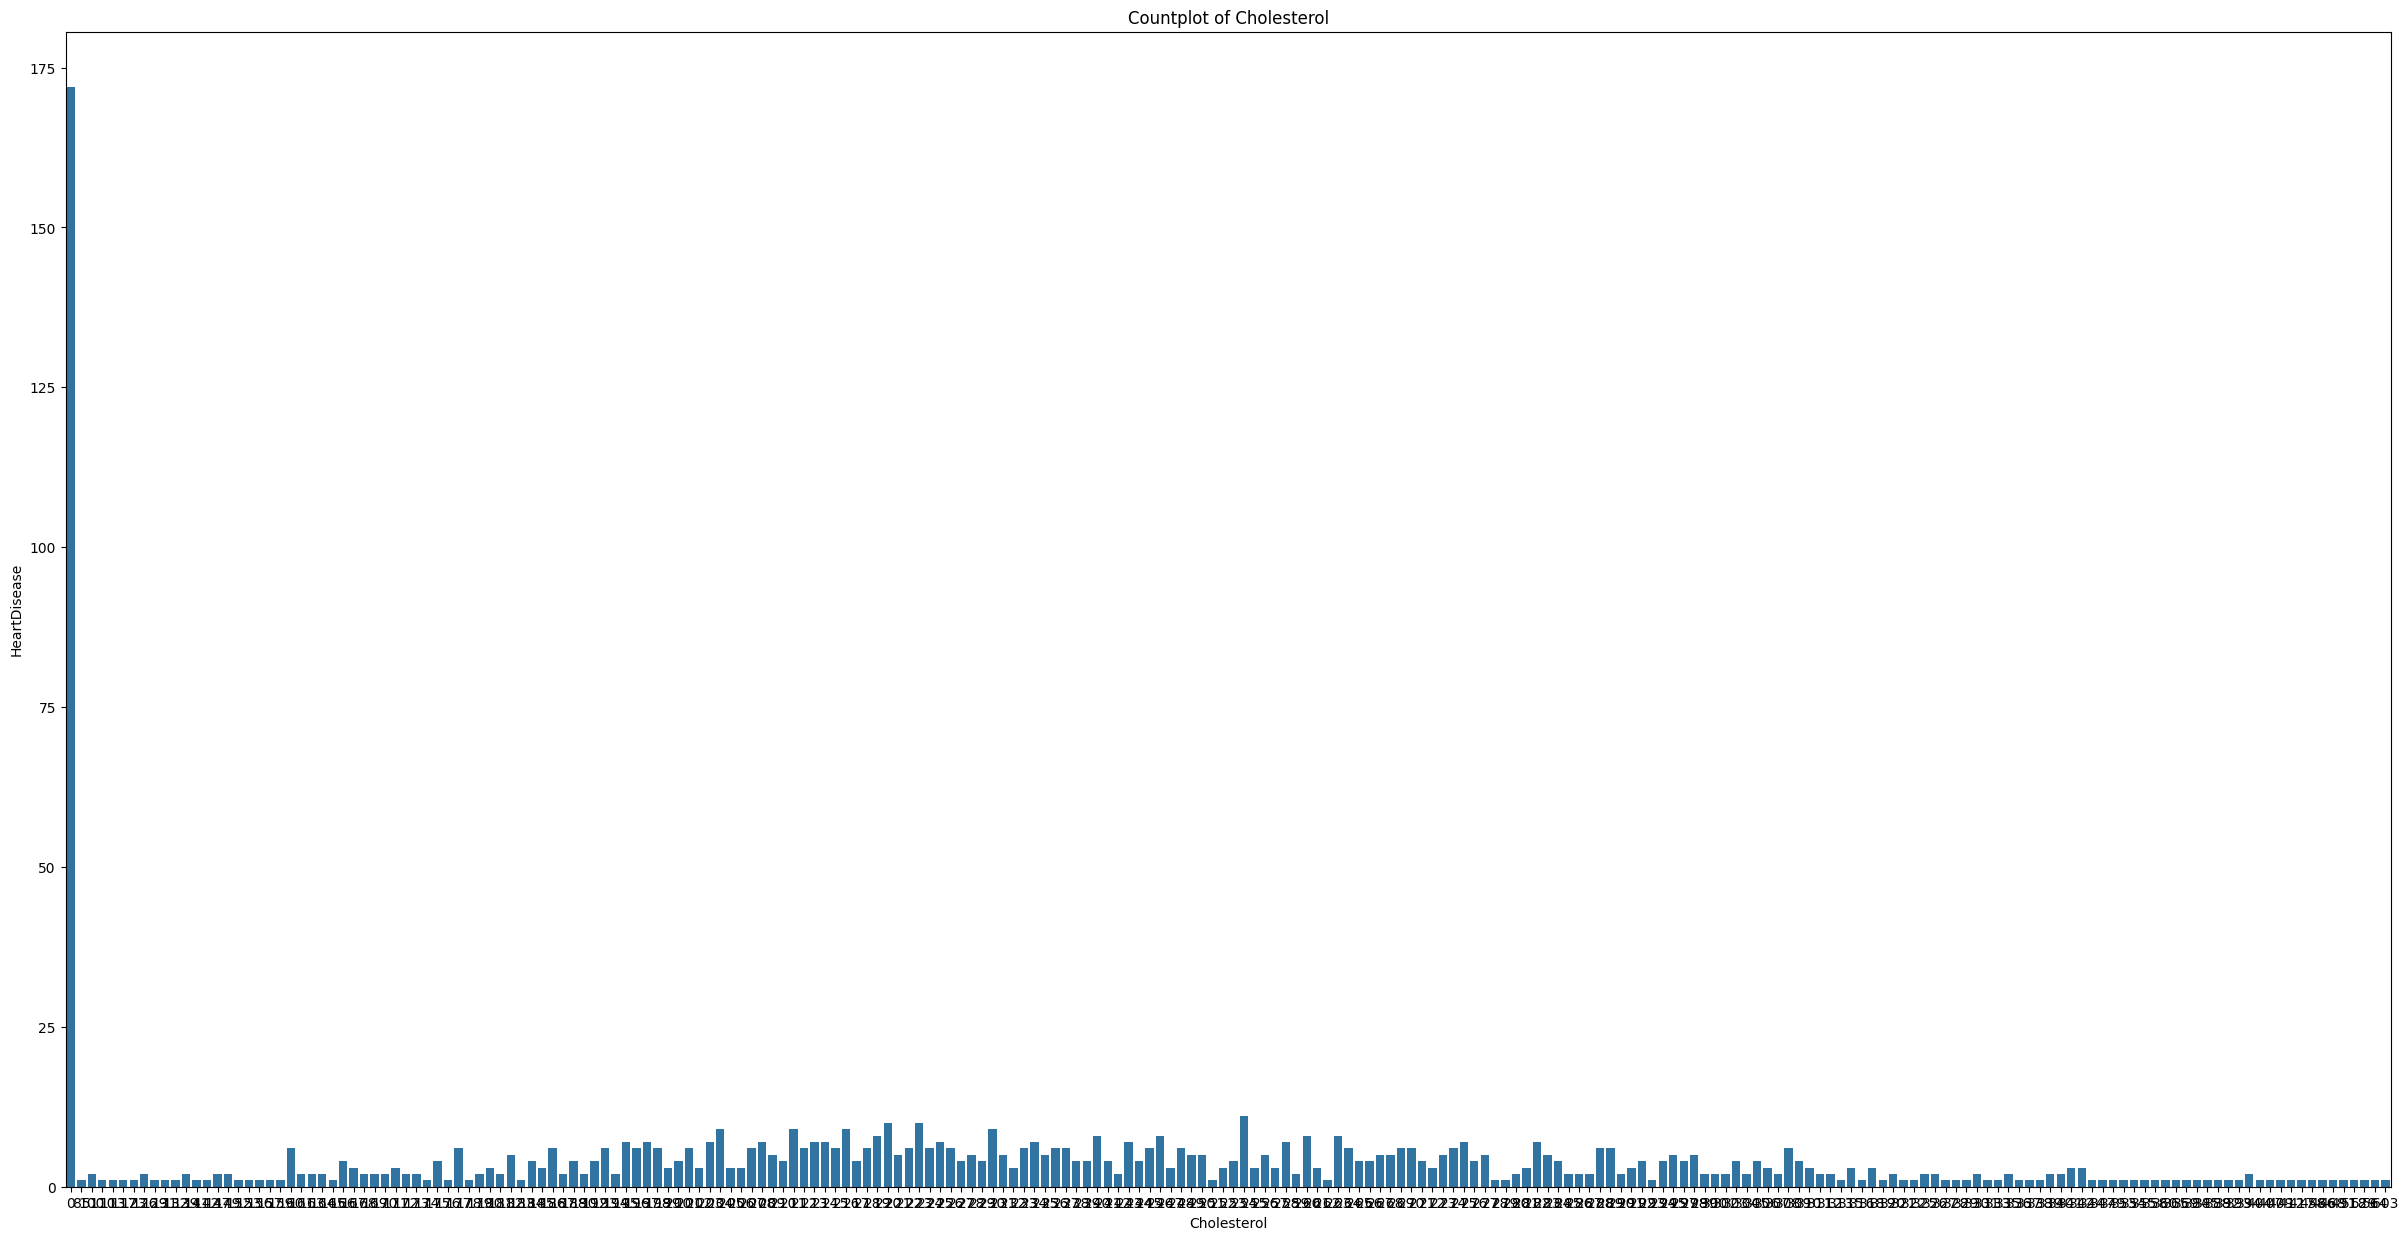

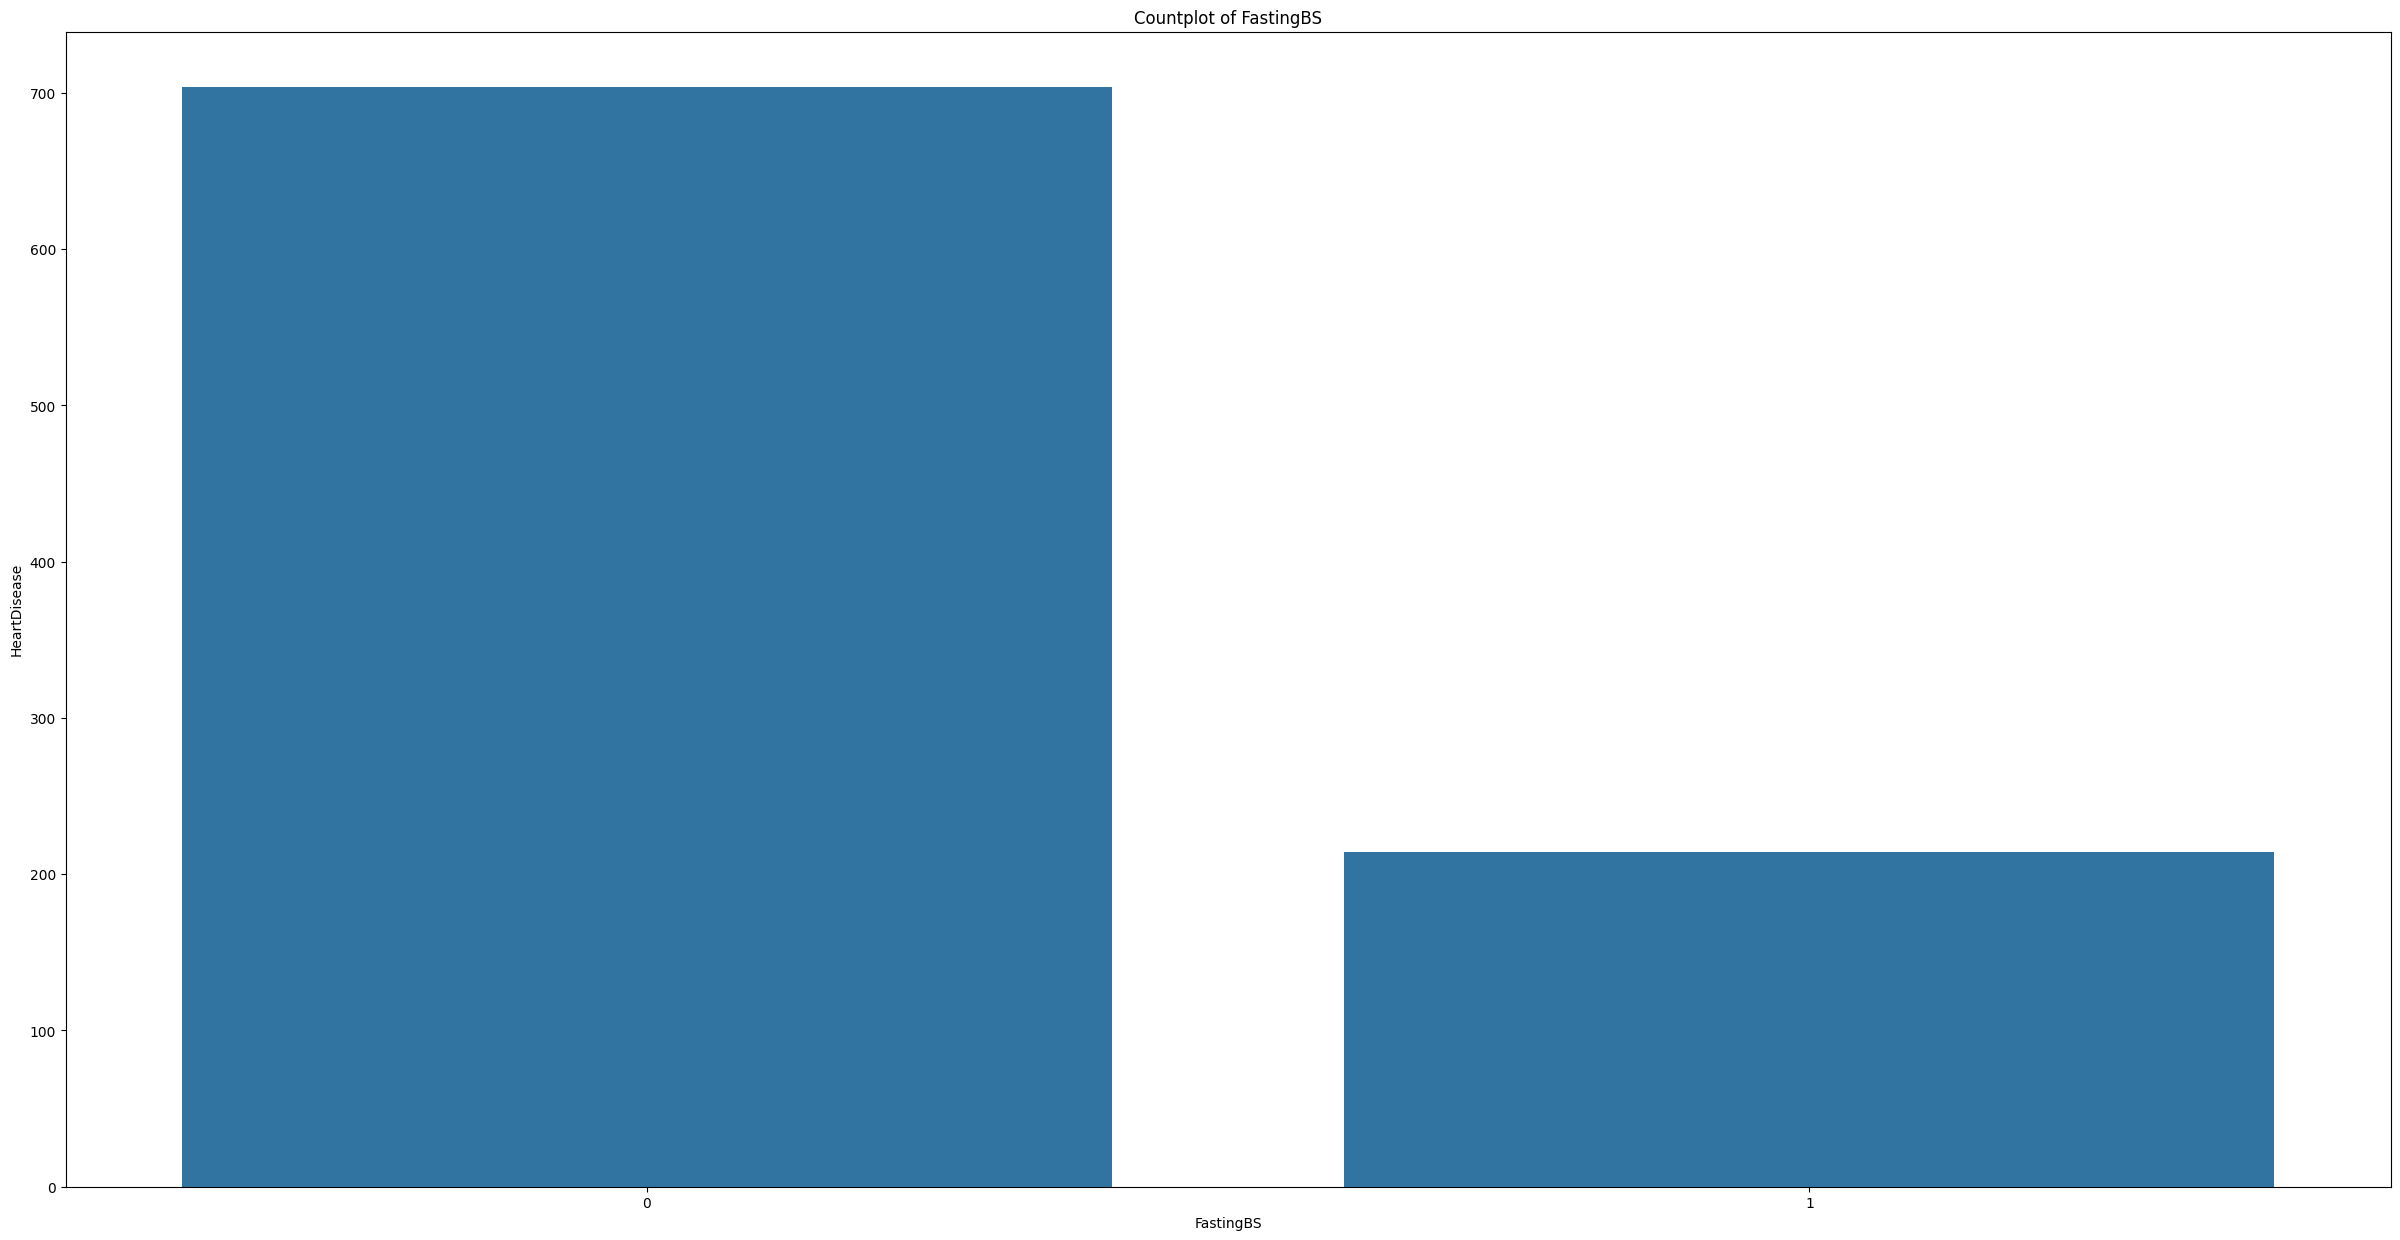

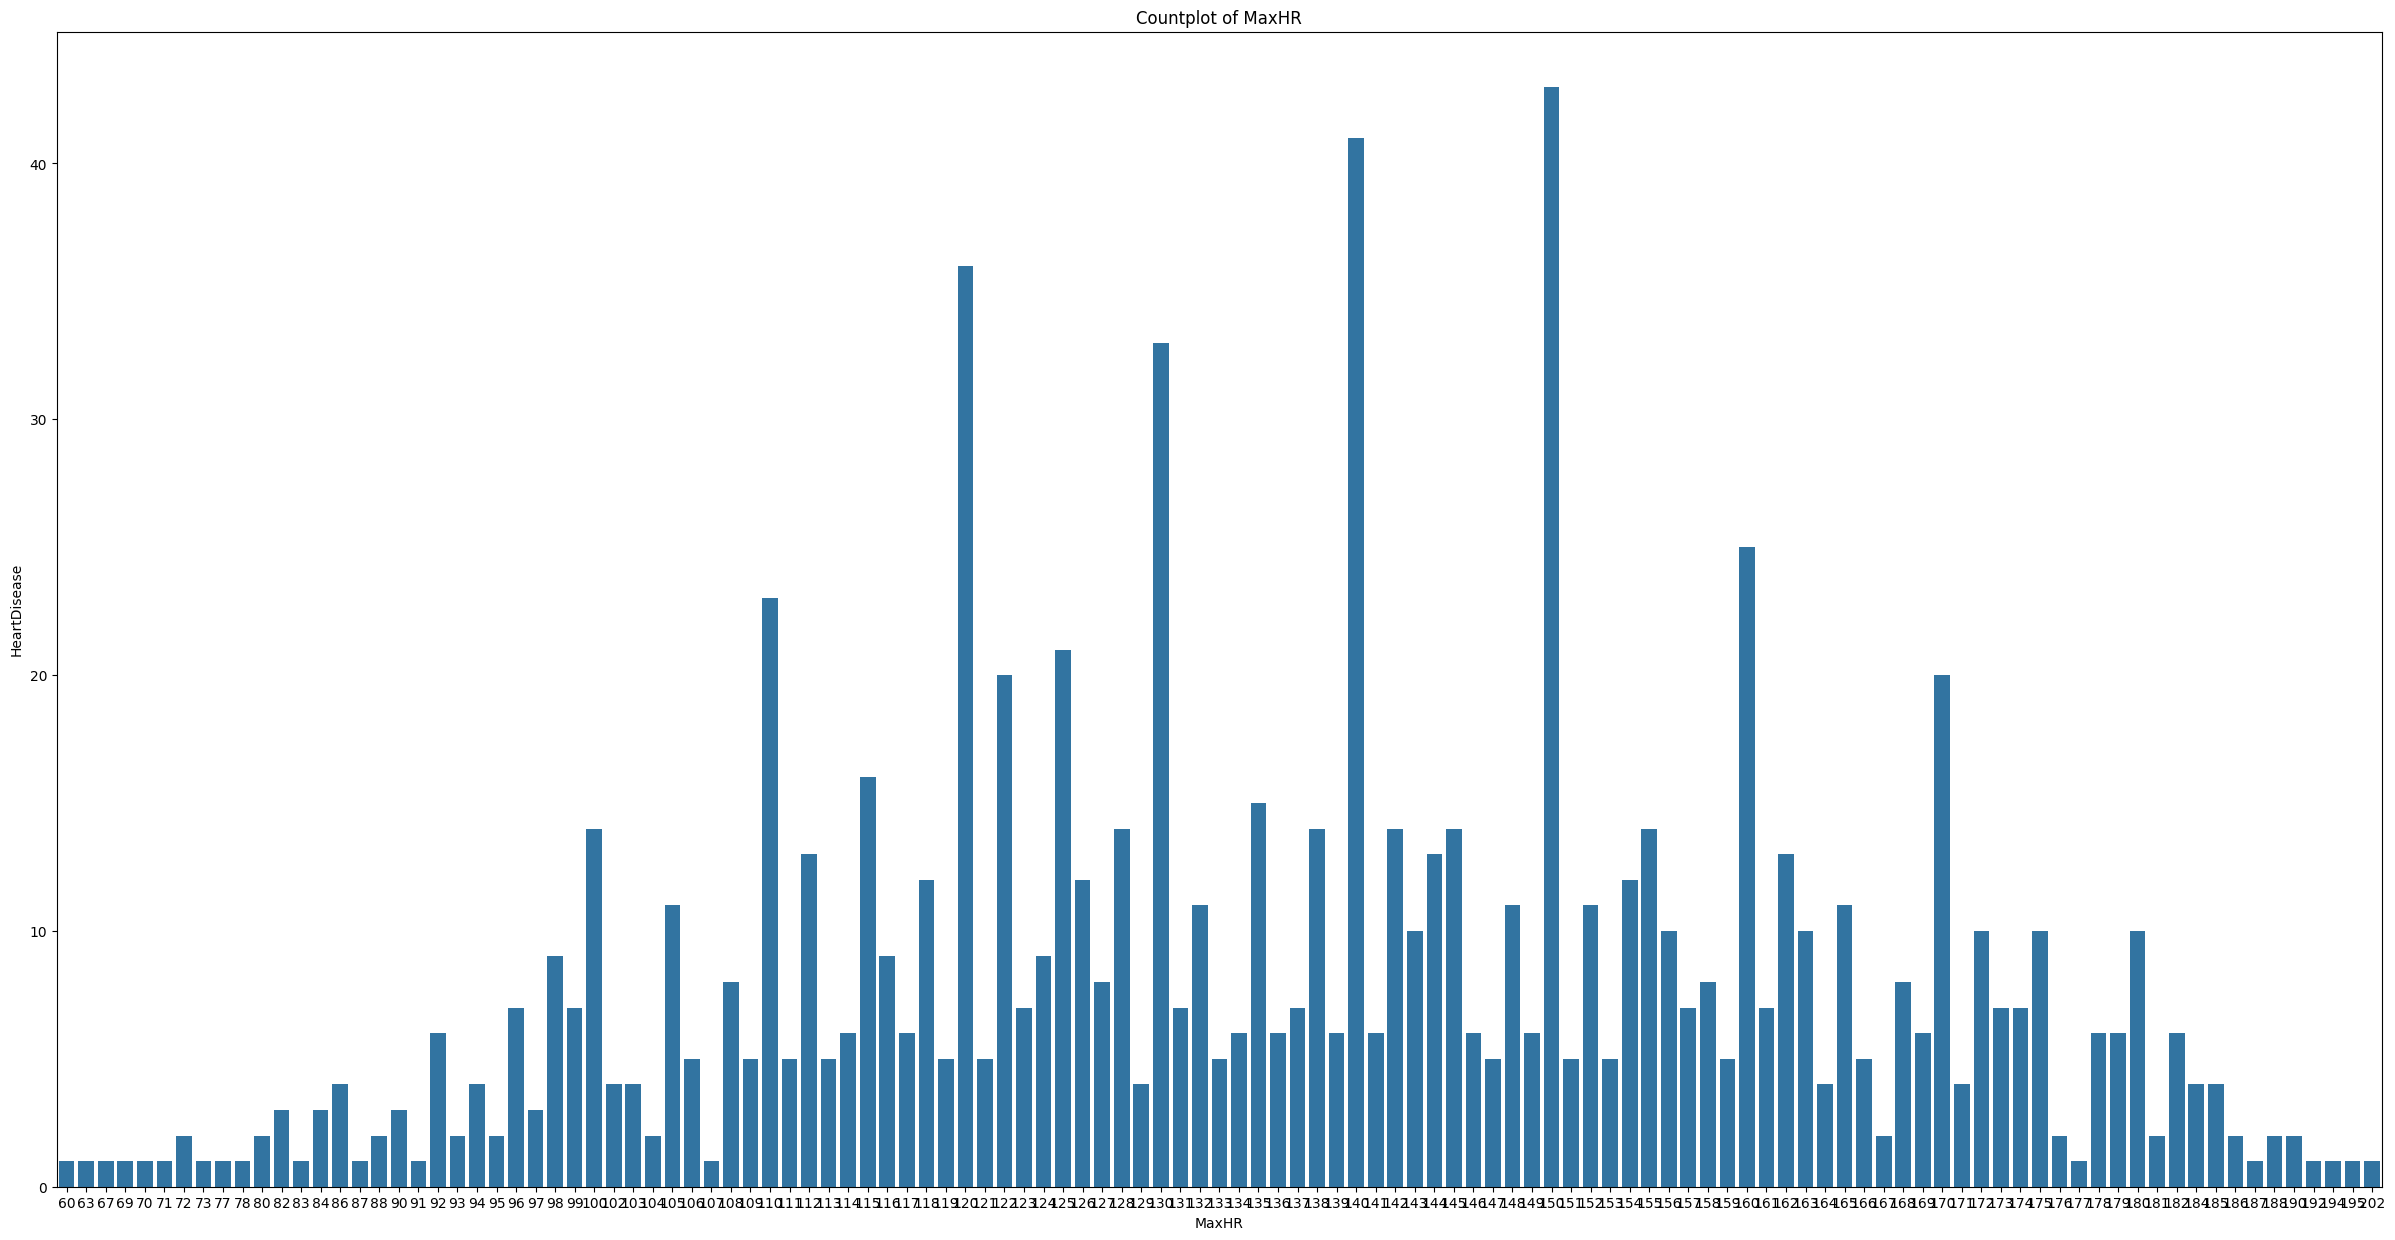

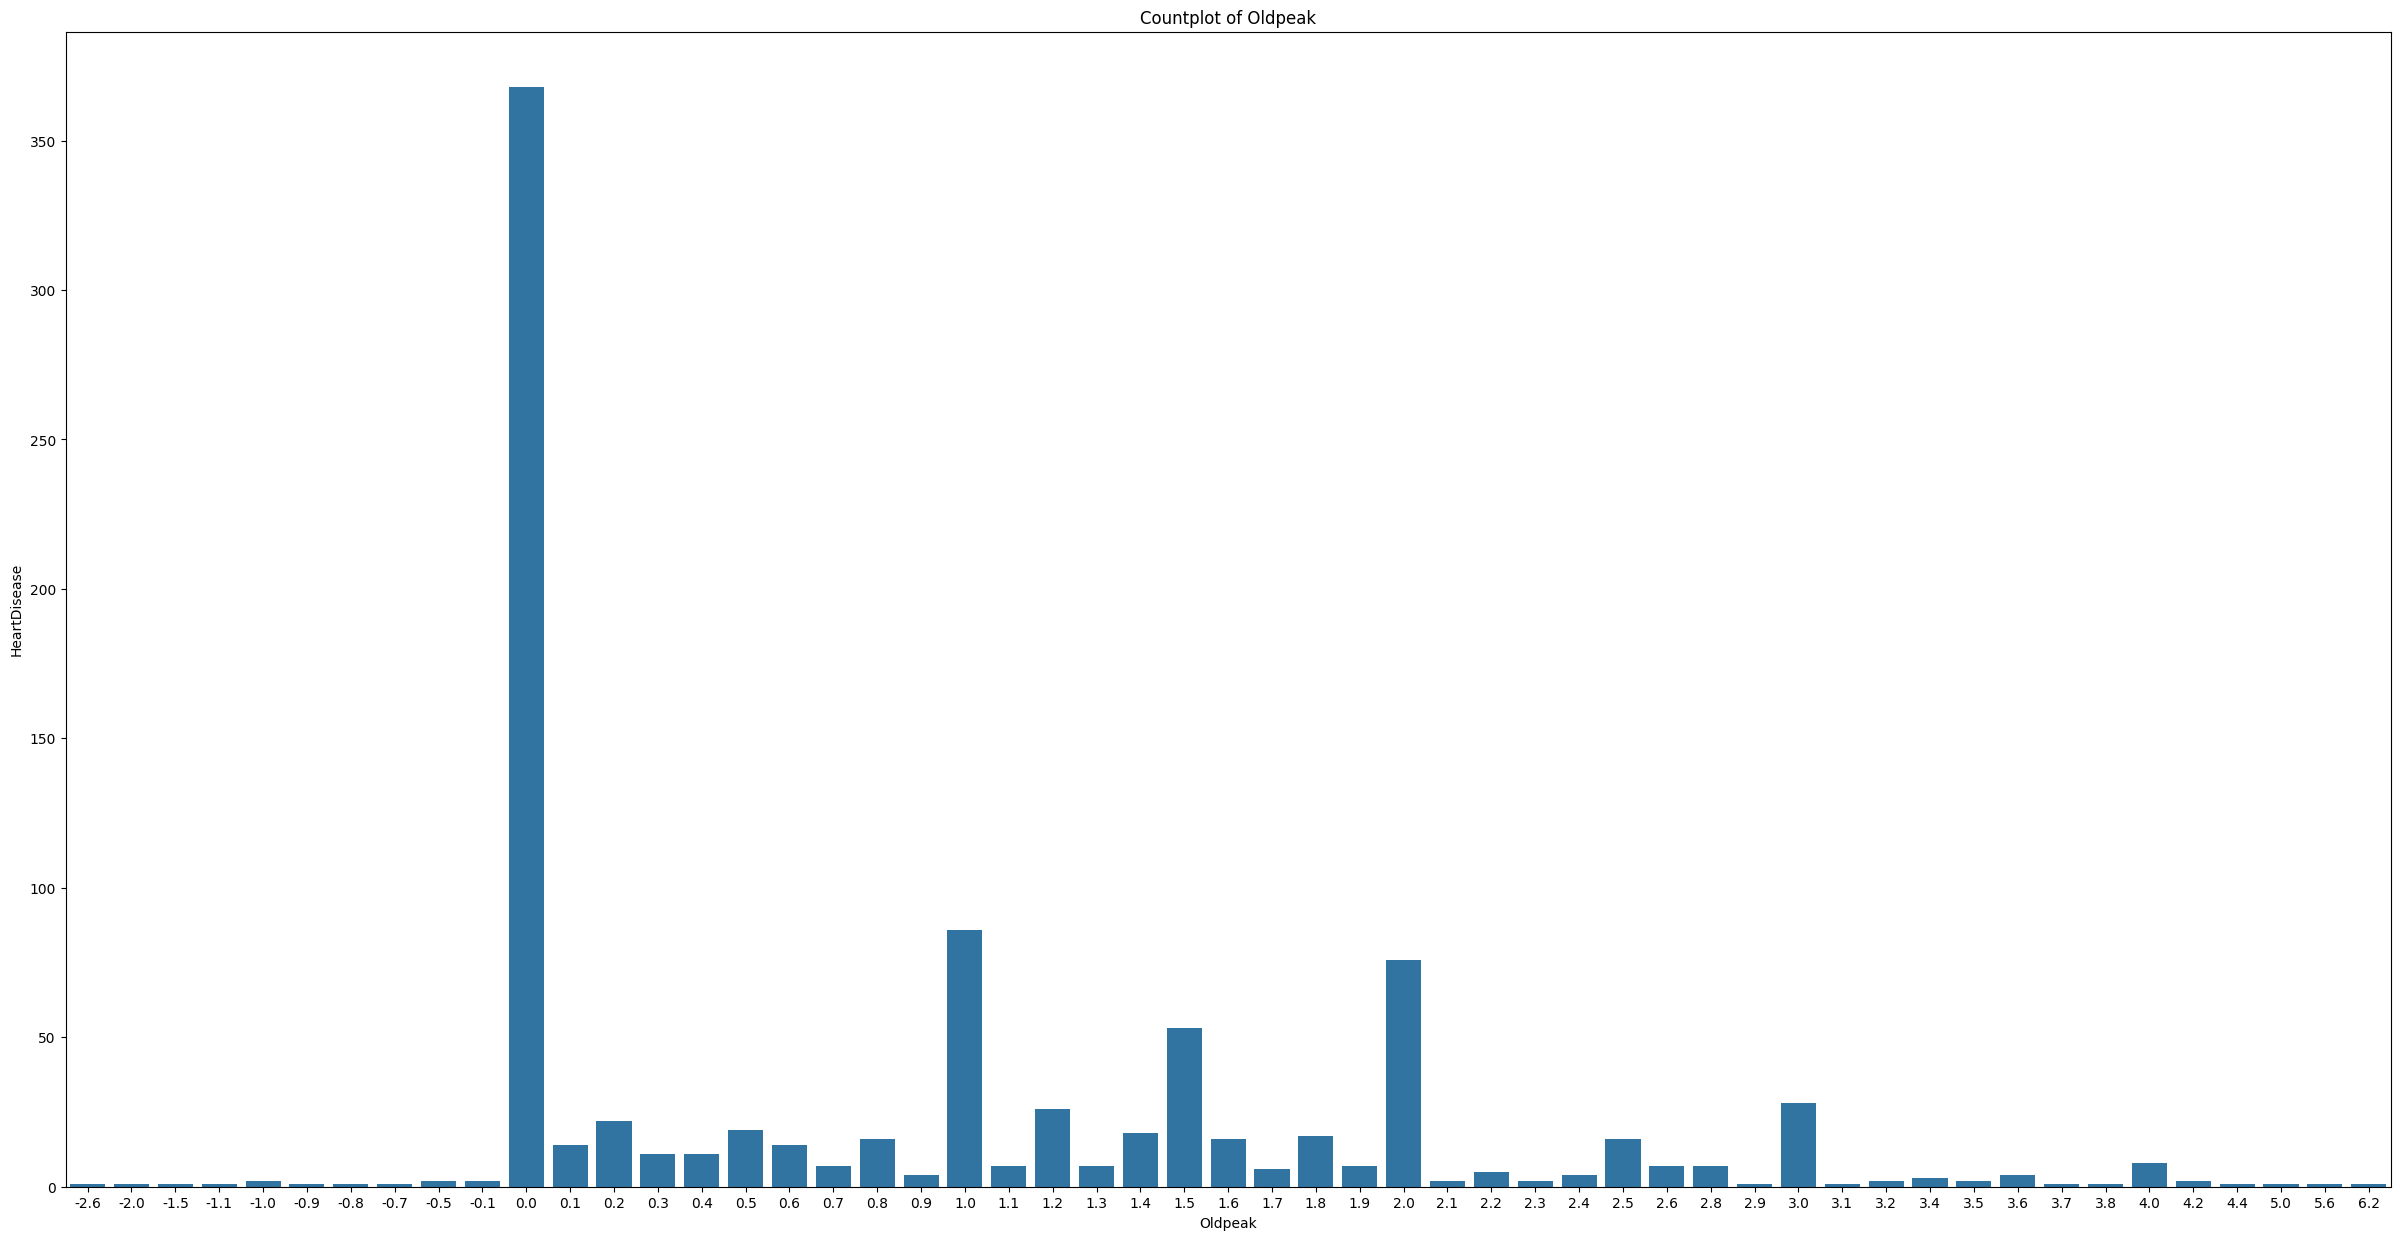

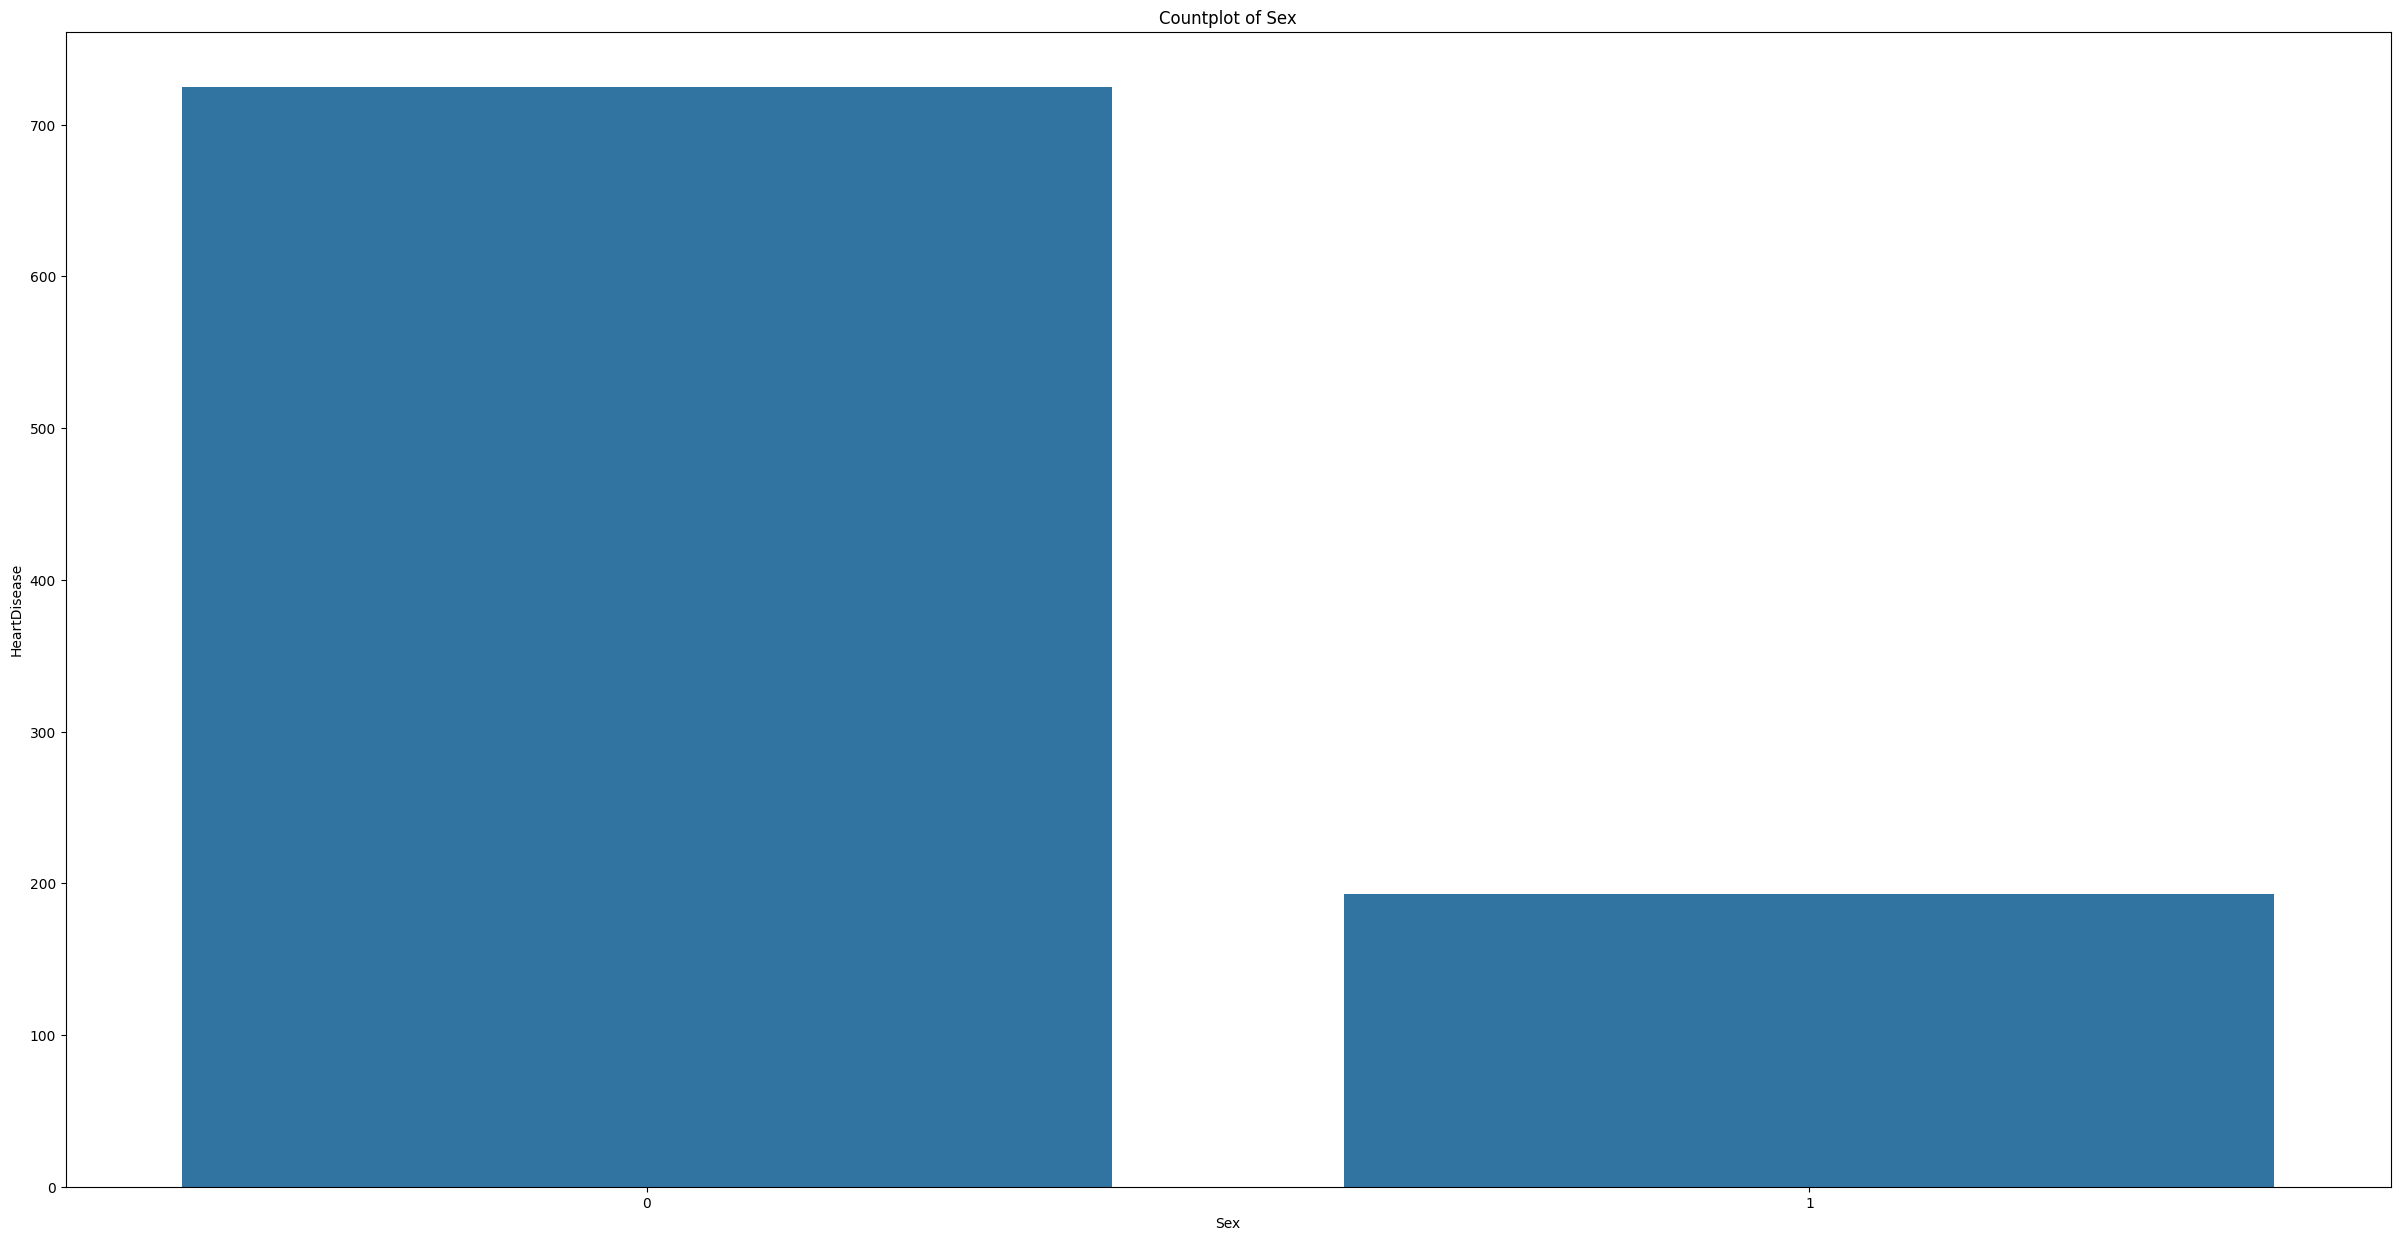

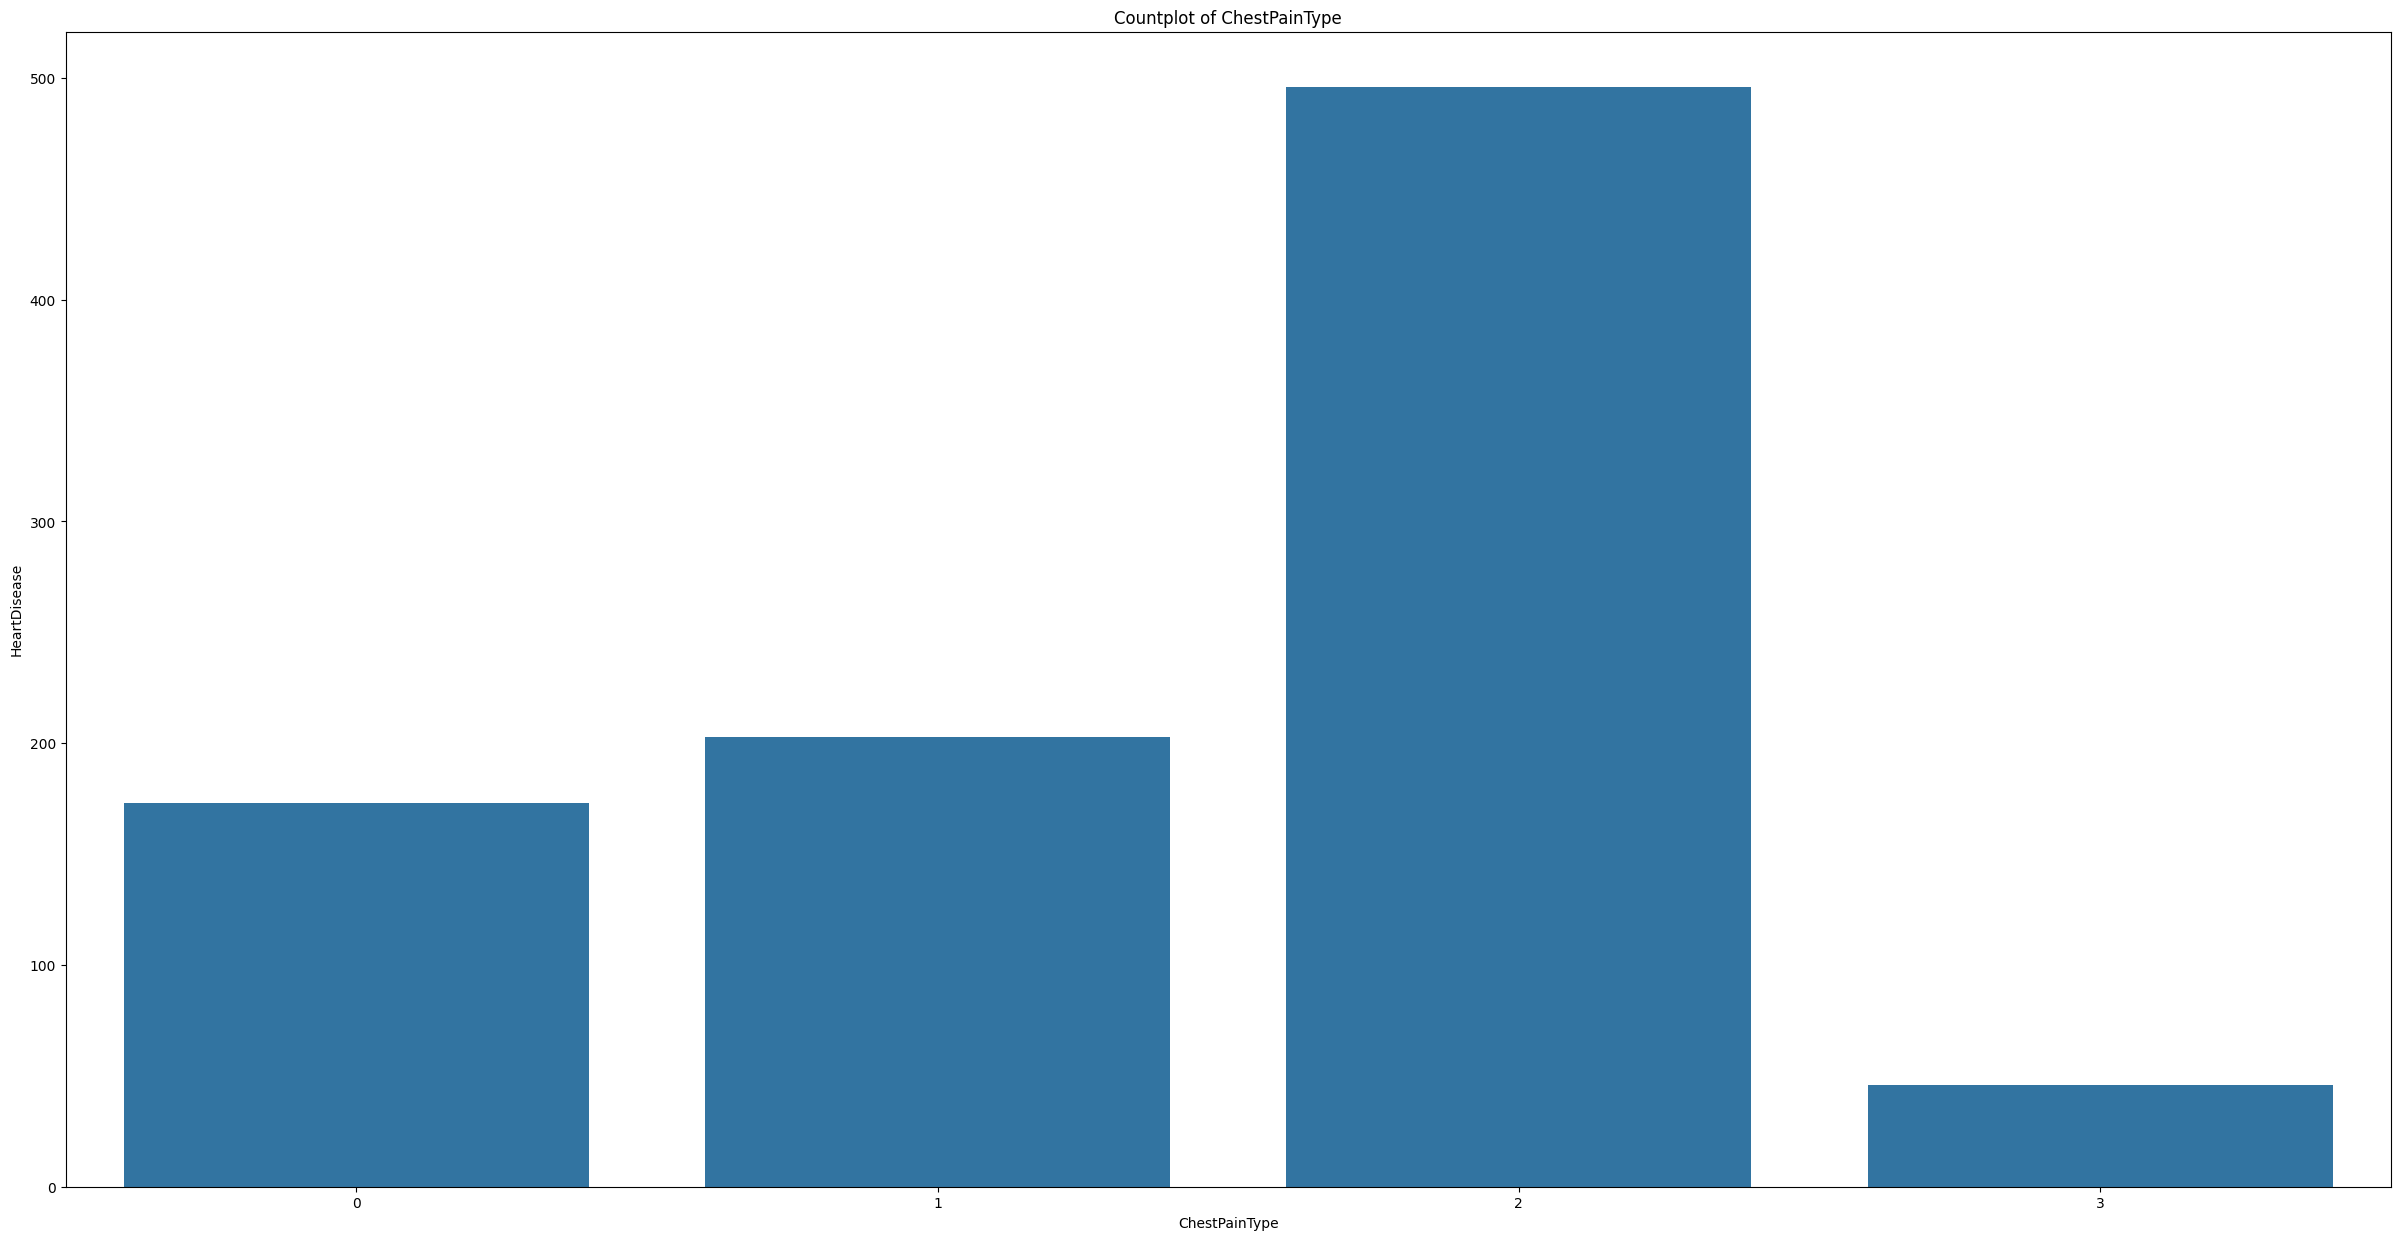

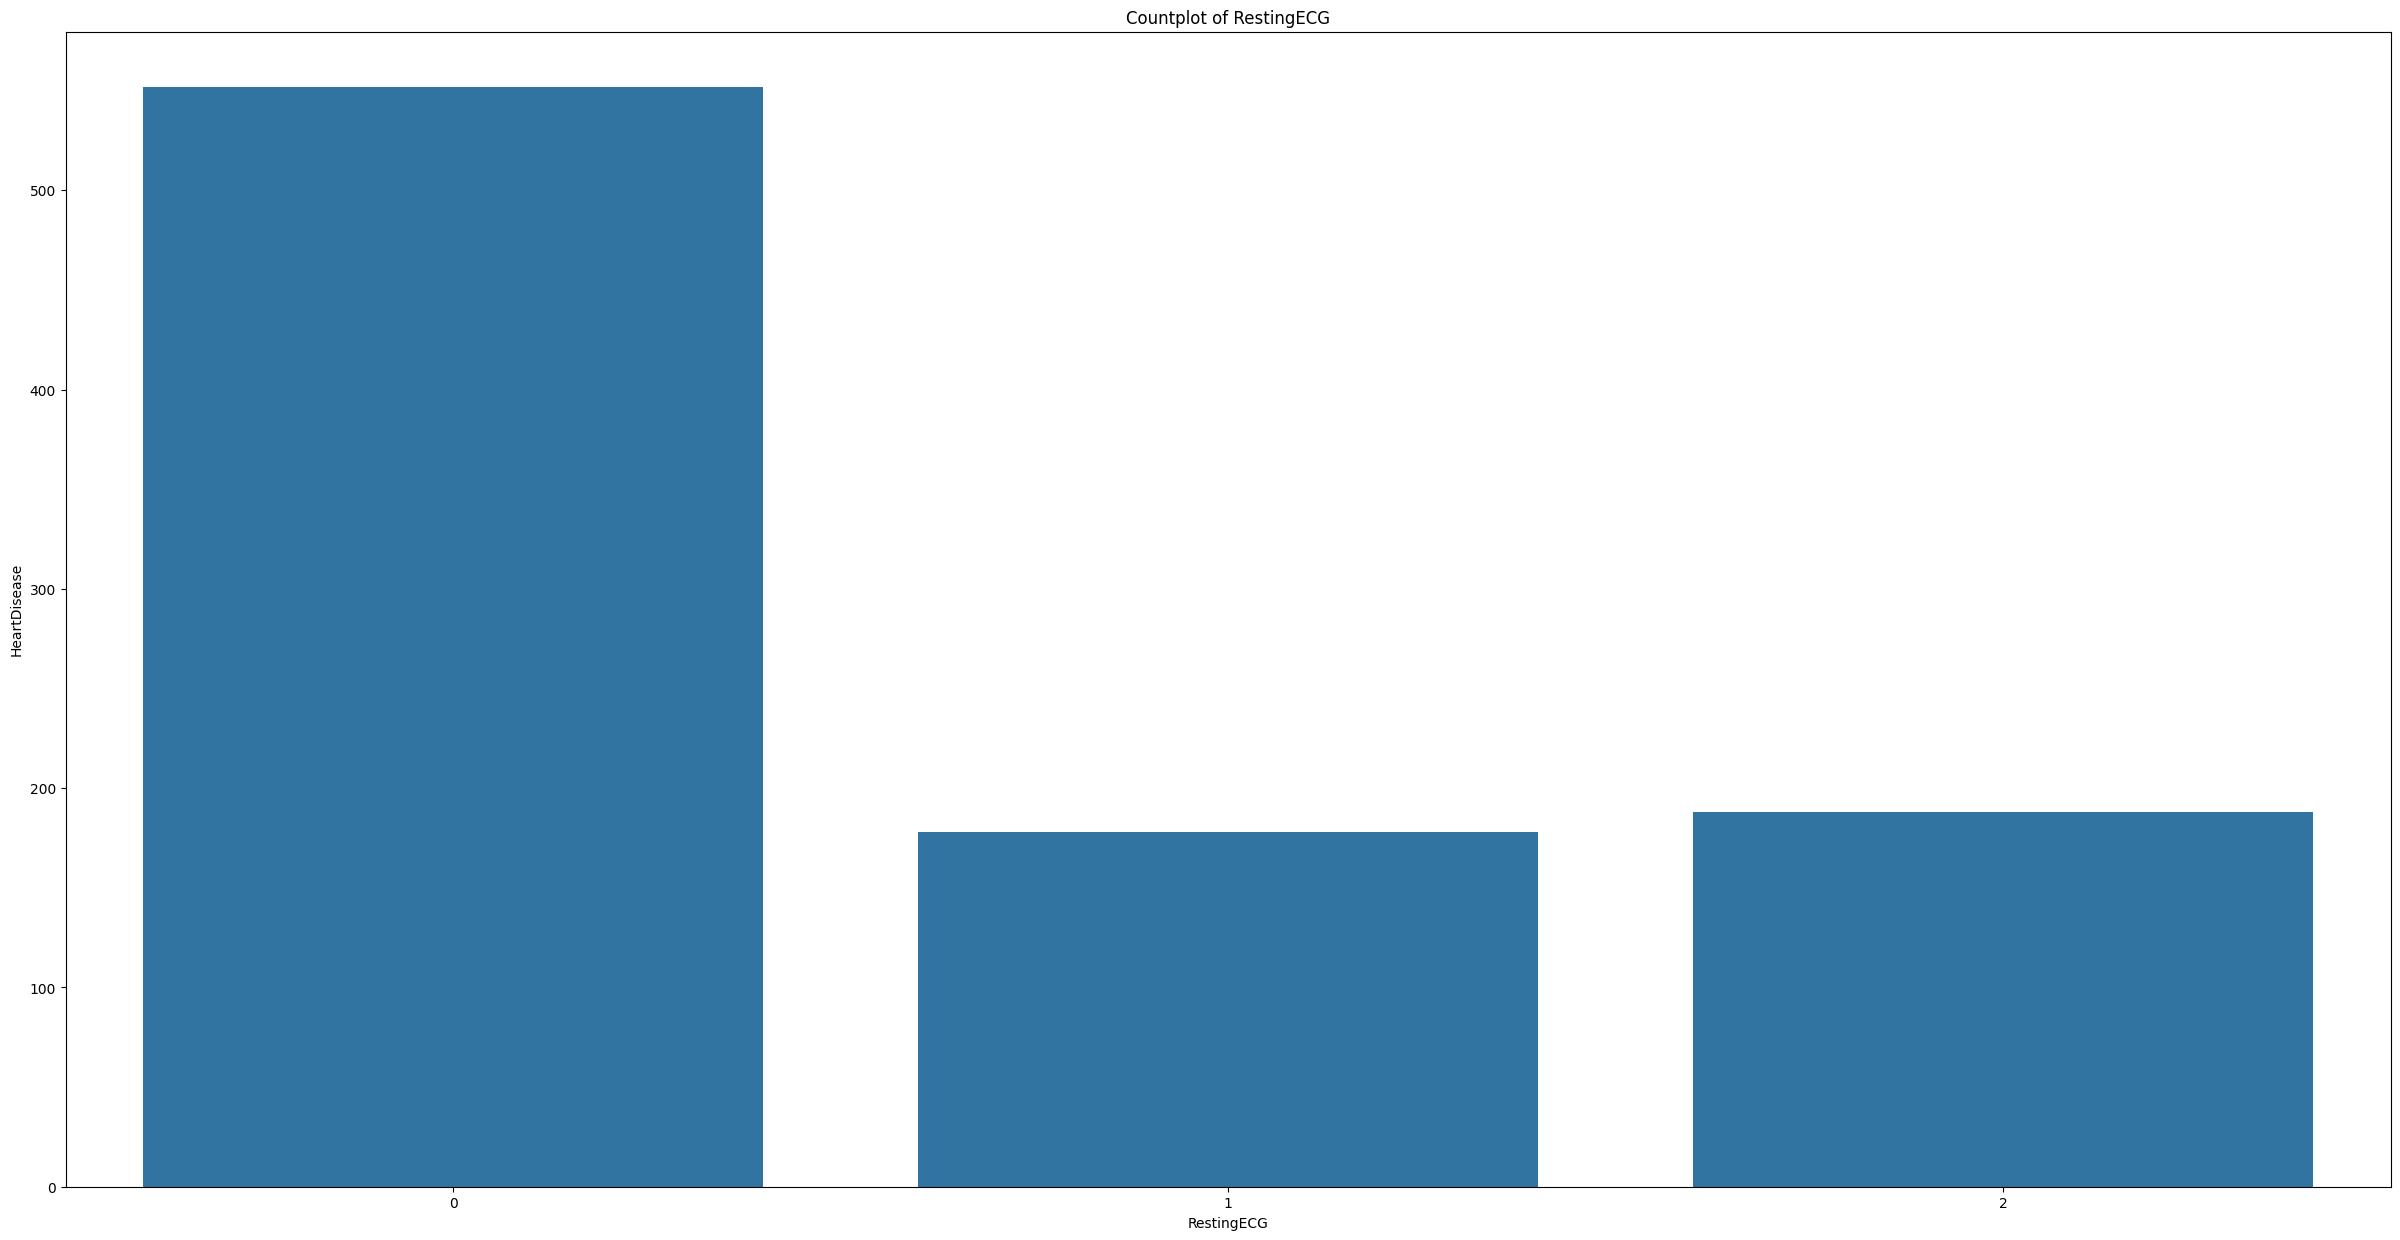

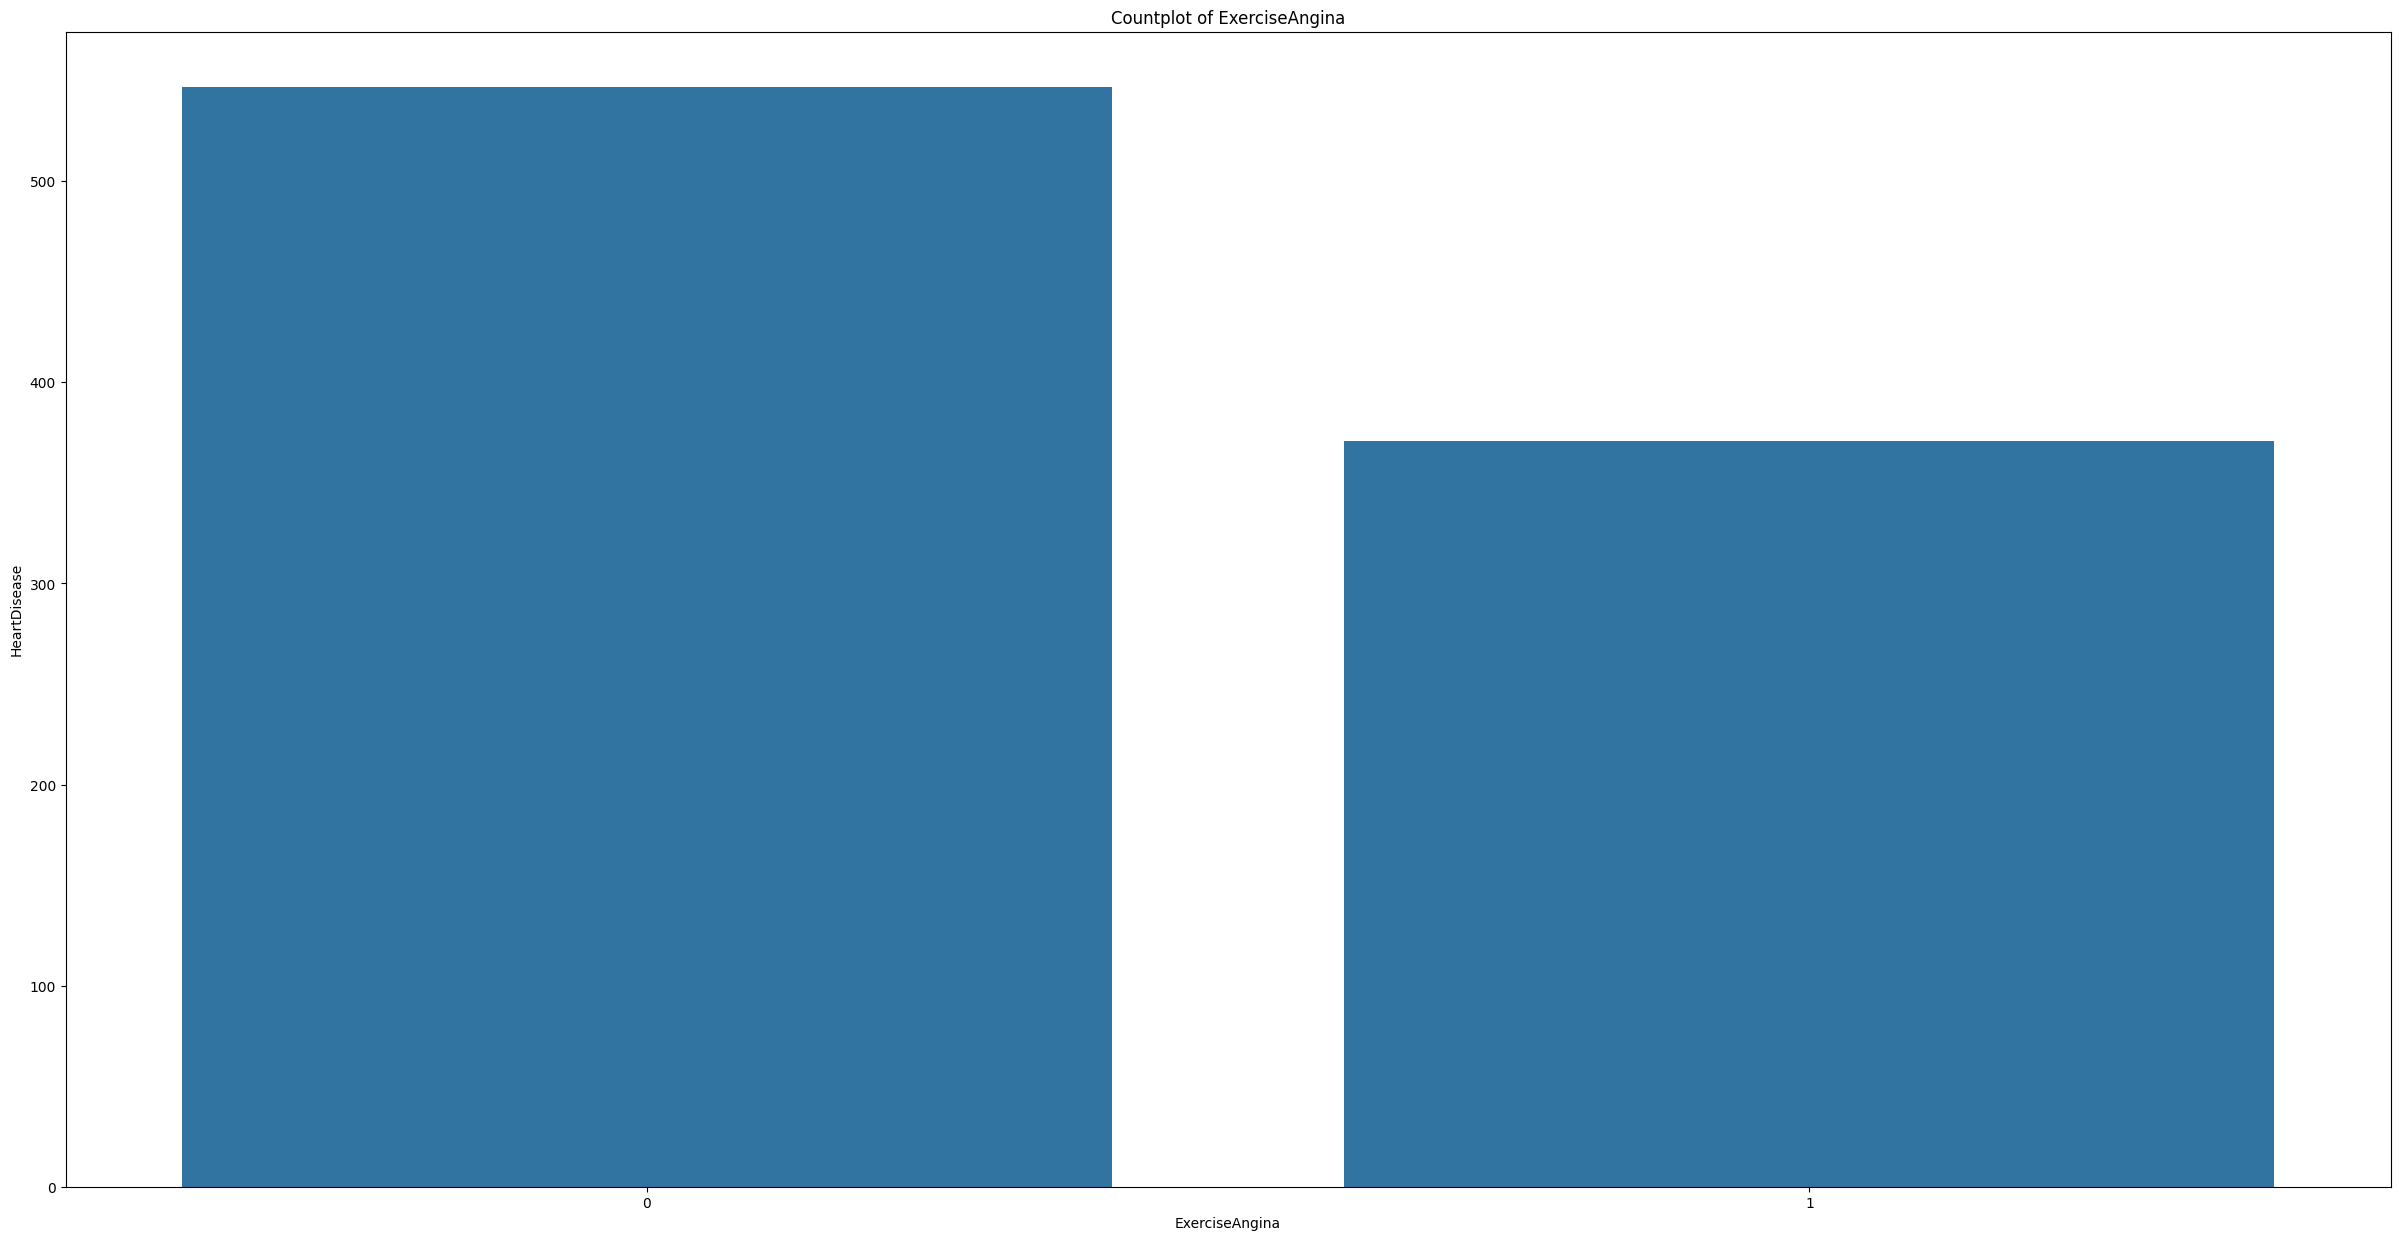

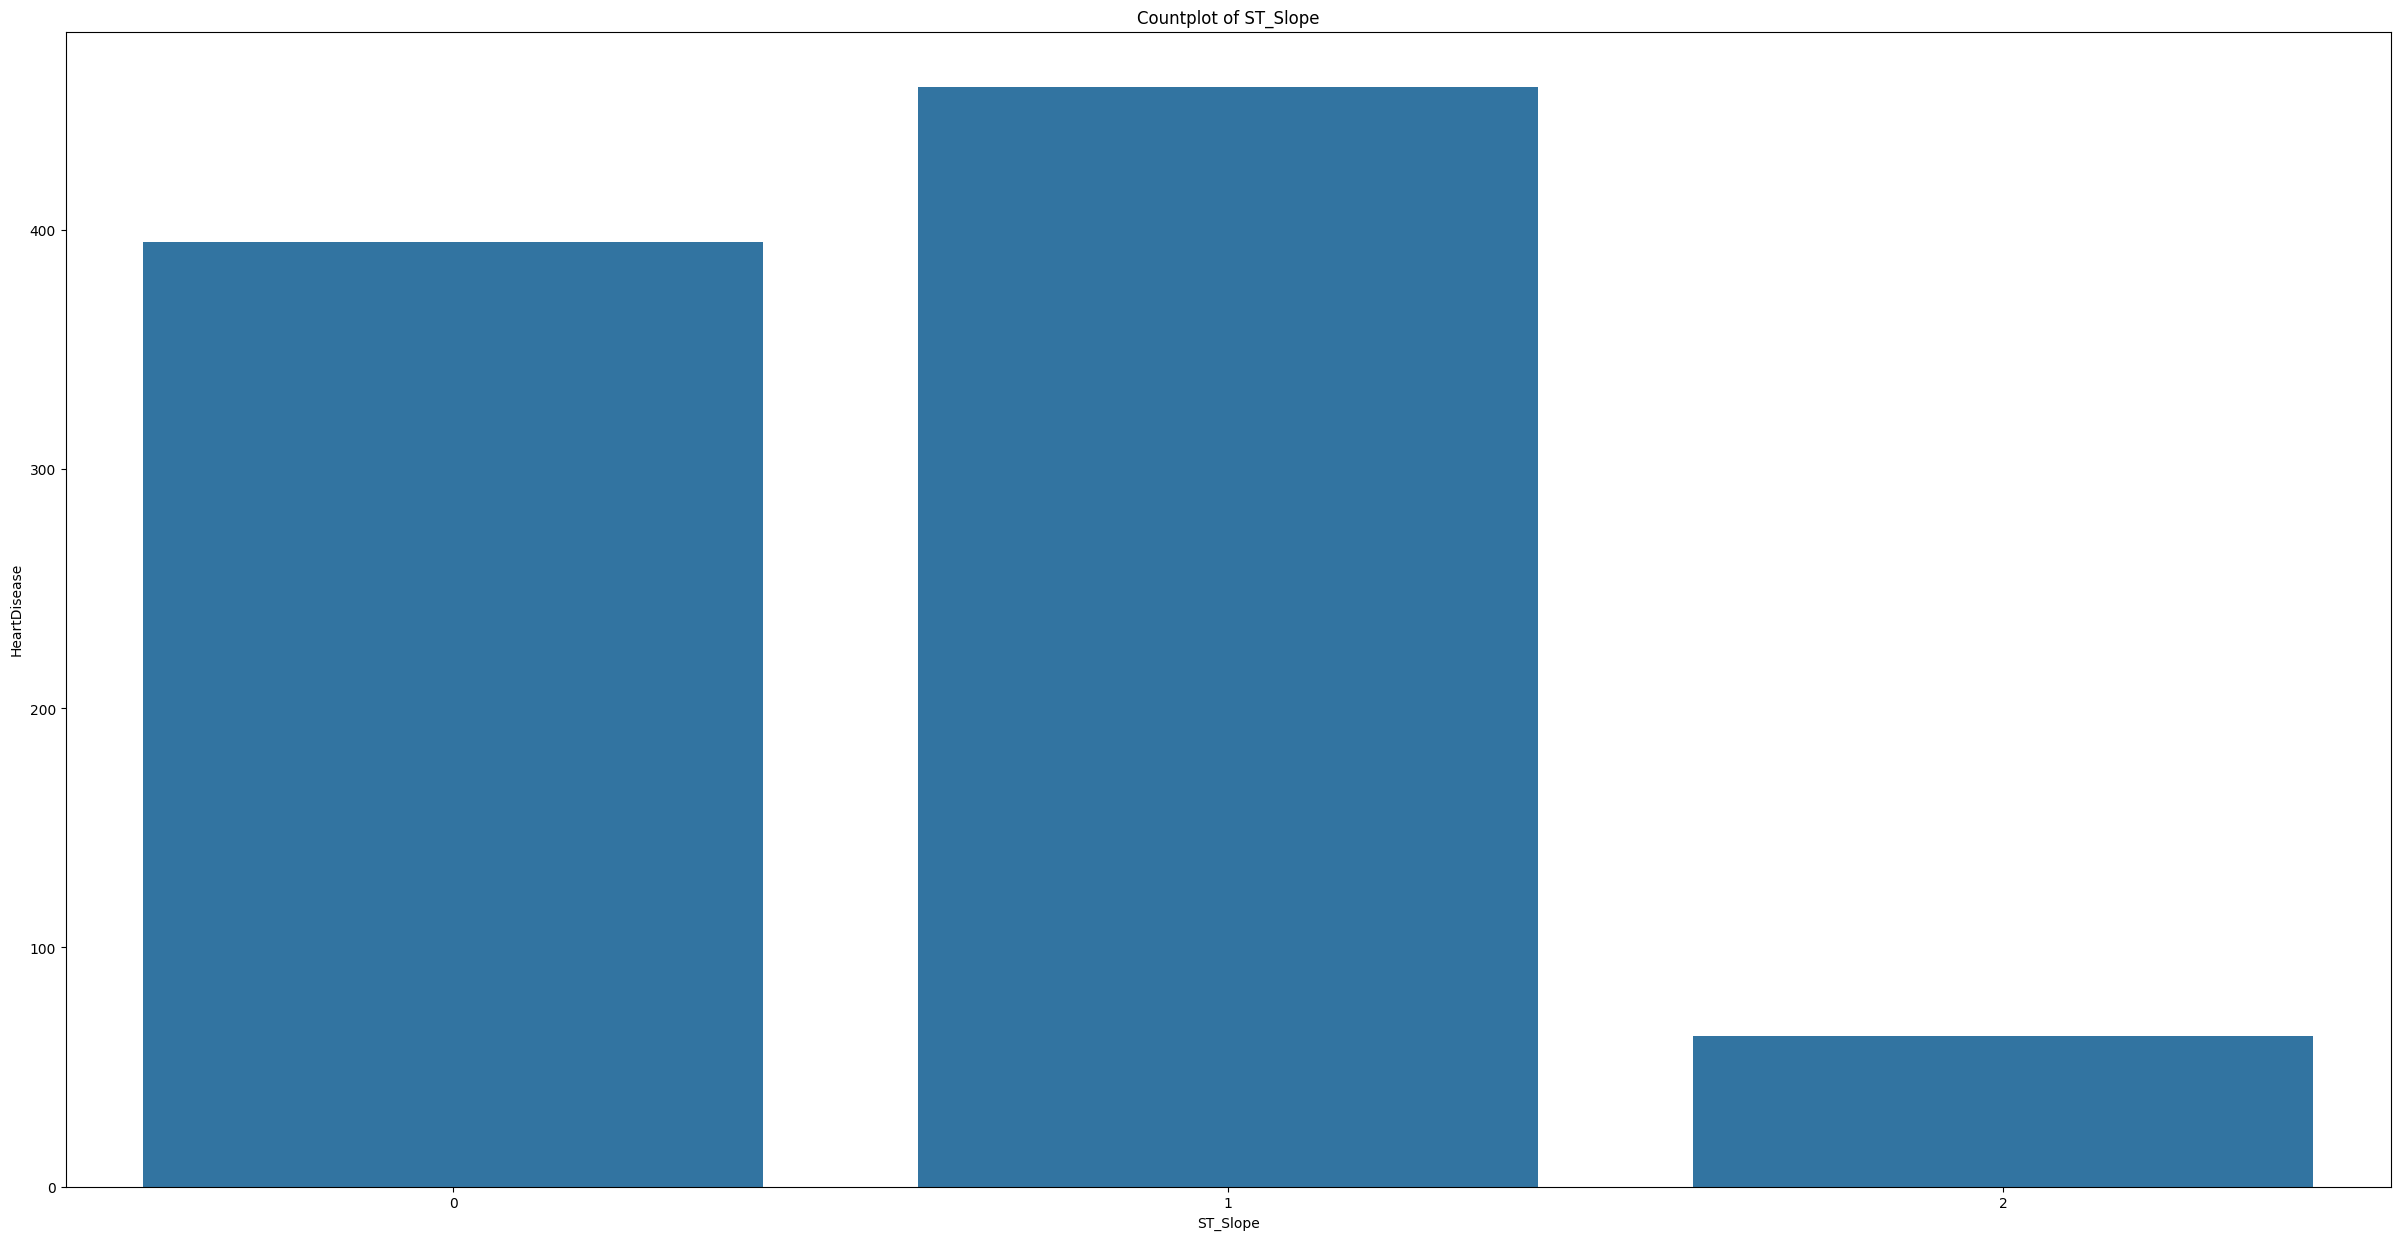

In [56]:
# Define the list of categorical columns to convert to numeric
df = pd.DataFrame(Heart_failure)
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',]
for column in columns_to_convert:
    df[column] = pd.factorize(df[column])[0]
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']+columns_to_convert

# Plot countplots for  features
for feature in numeric_features:
    plt.figure(figsize=(30, 15))
    sns.countplot(x=df[feature])
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('HeartDisease')
    plt.show()

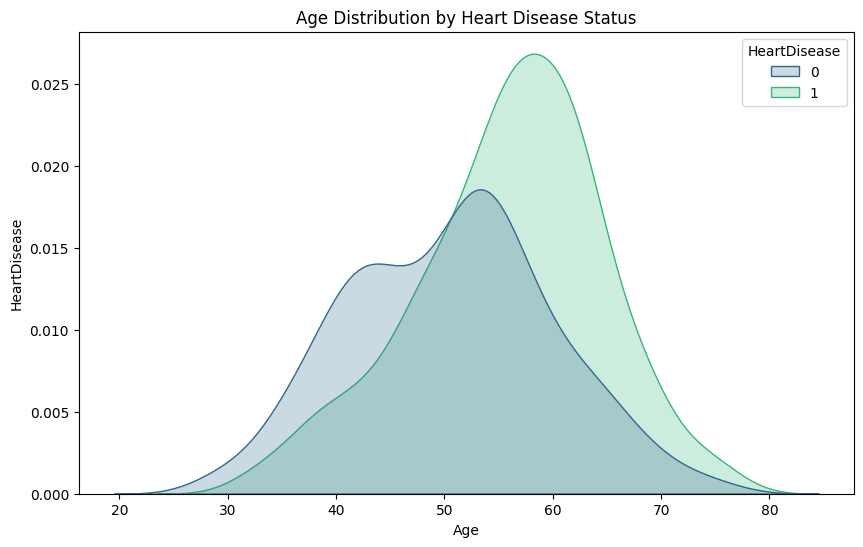

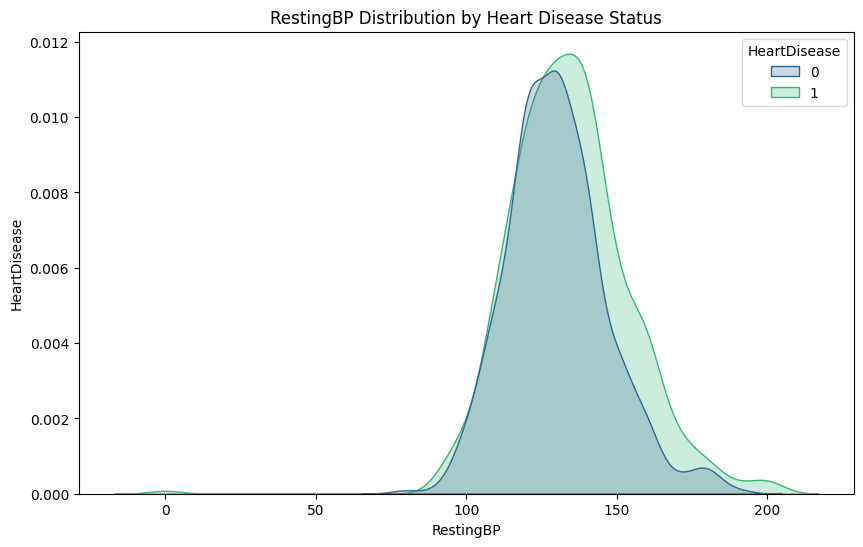

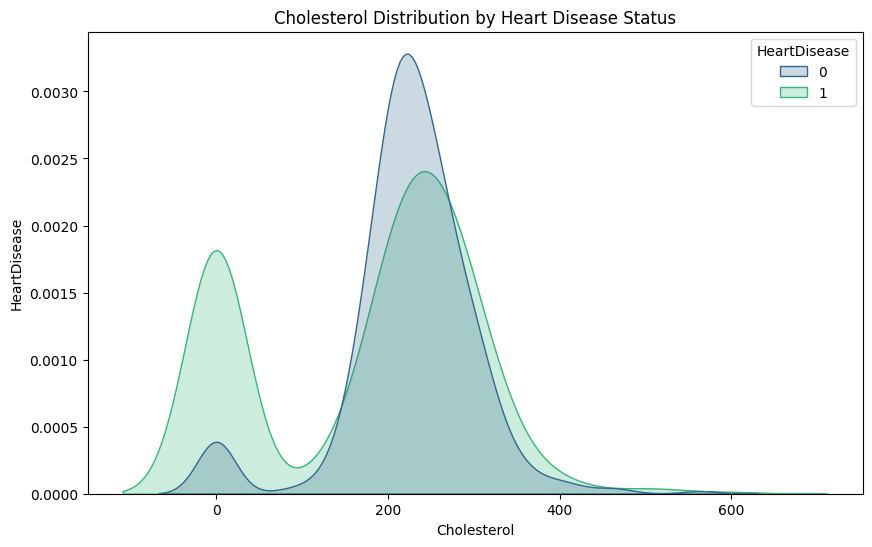

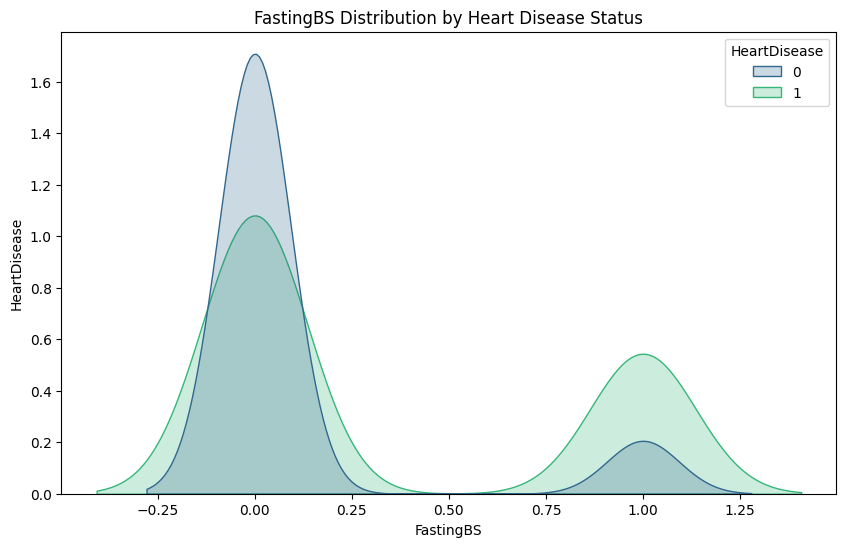

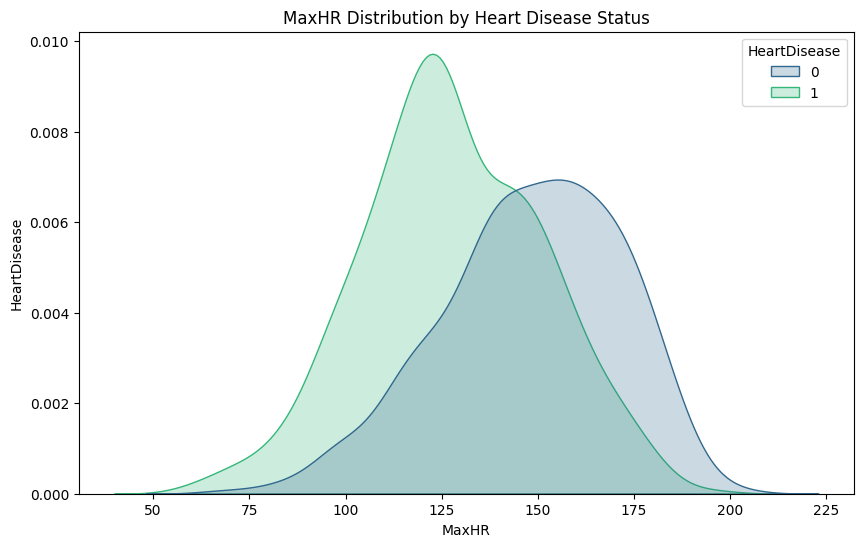

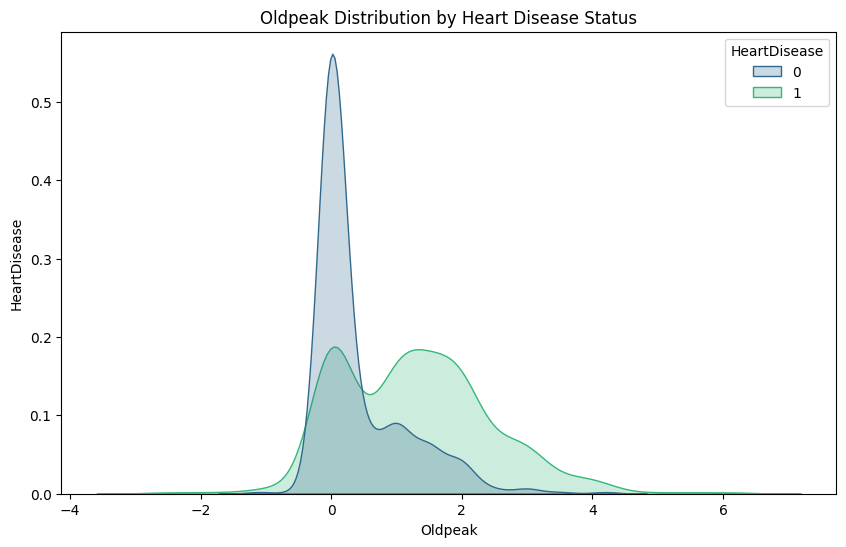

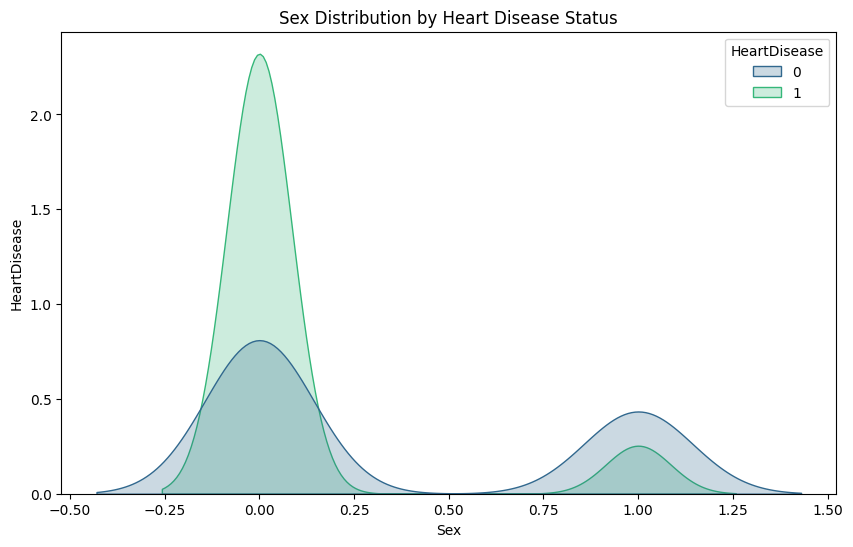

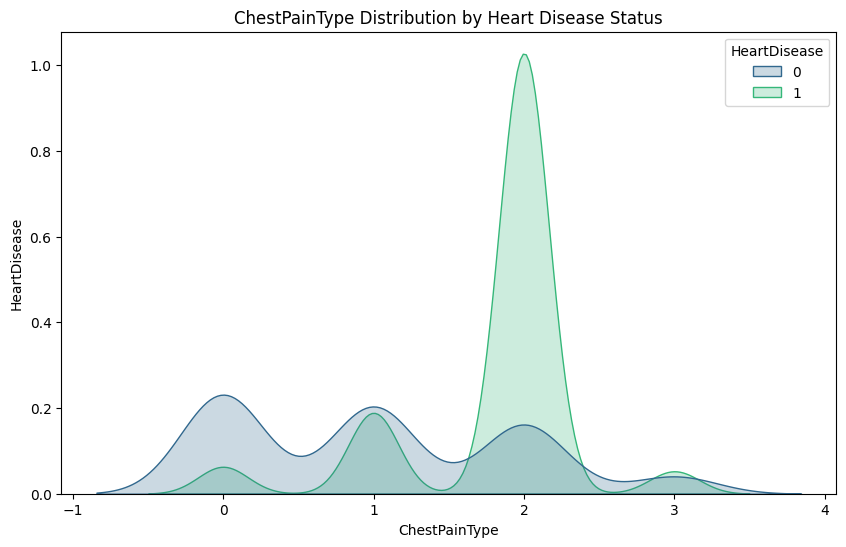

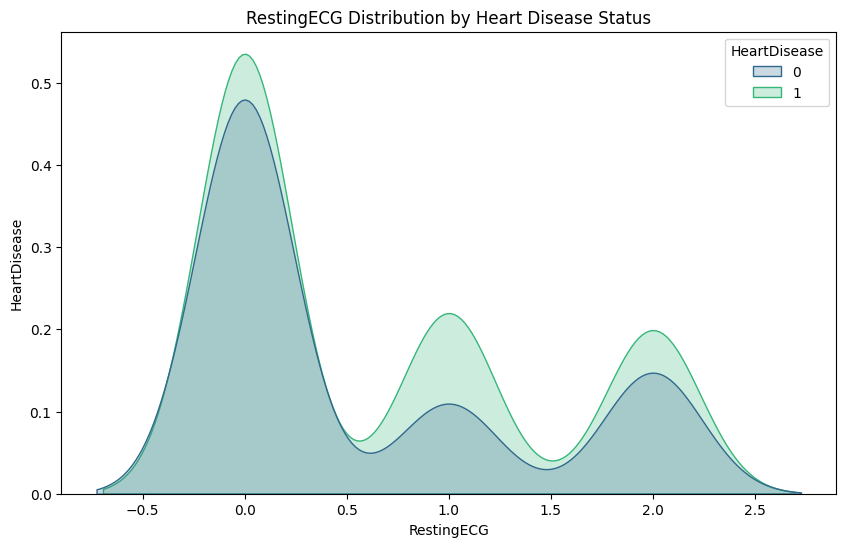

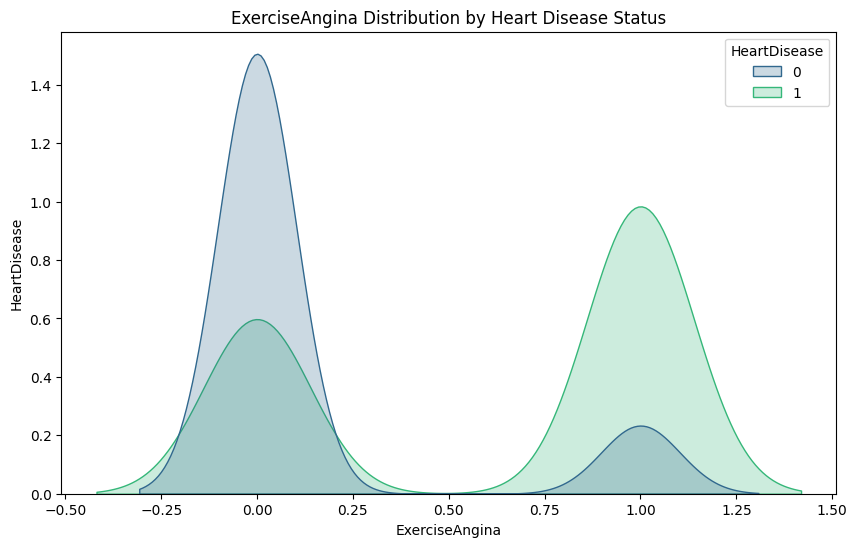

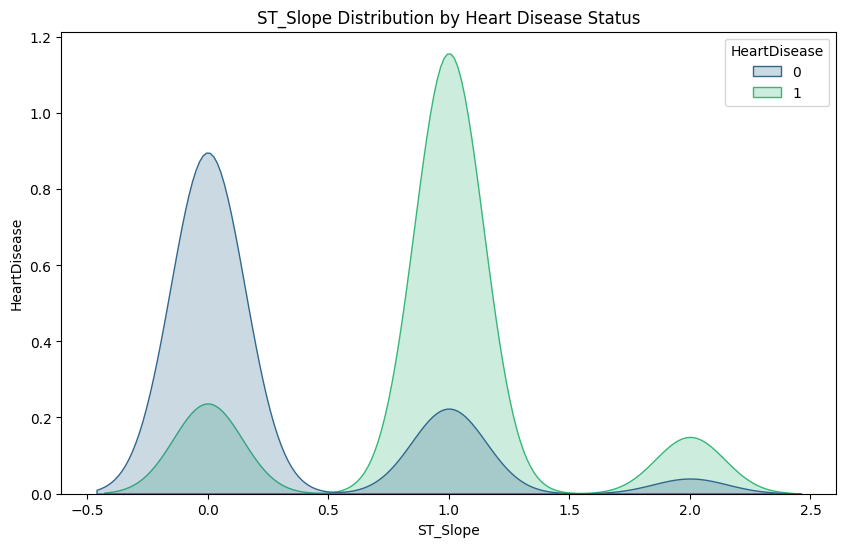

In [57]:
# Define the list of categorical columns to convert to numeric
df = pd.DataFrame(Heart_failure)
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for column in columns_to_convert:
    df[column] = pd.factorize(df[column])[0]

# Concatenate numeric features with converted categorical columns
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'] + columns_to_convert

# Plotting KDE for numeric features
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    if feature in df.columns:  
        sns.kdeplot(data=df, x=feature, hue='HeartDisease', fill=True, palette='viridis')
        plt.title(f'{feature} Distribution by Heart Disease Status')
        plt.xlabel(feature)
        plt.ylabel('HeartDisease')
        plt.show()

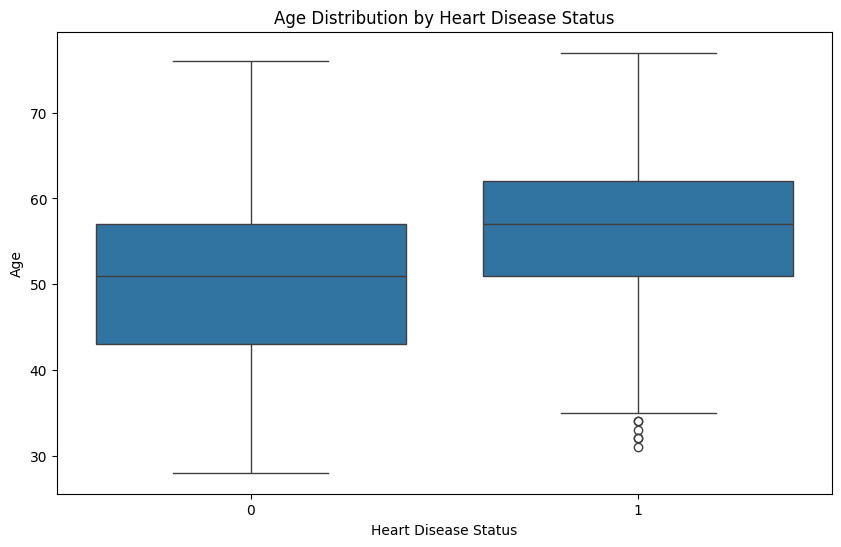

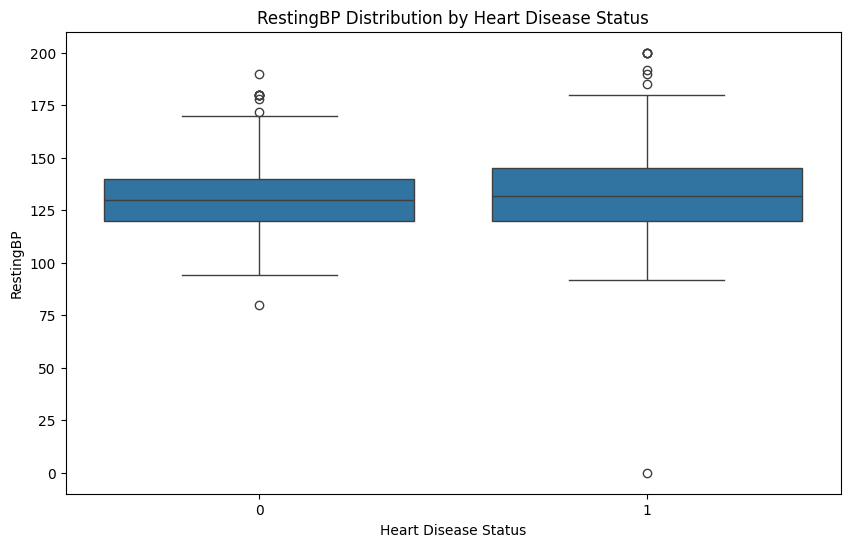

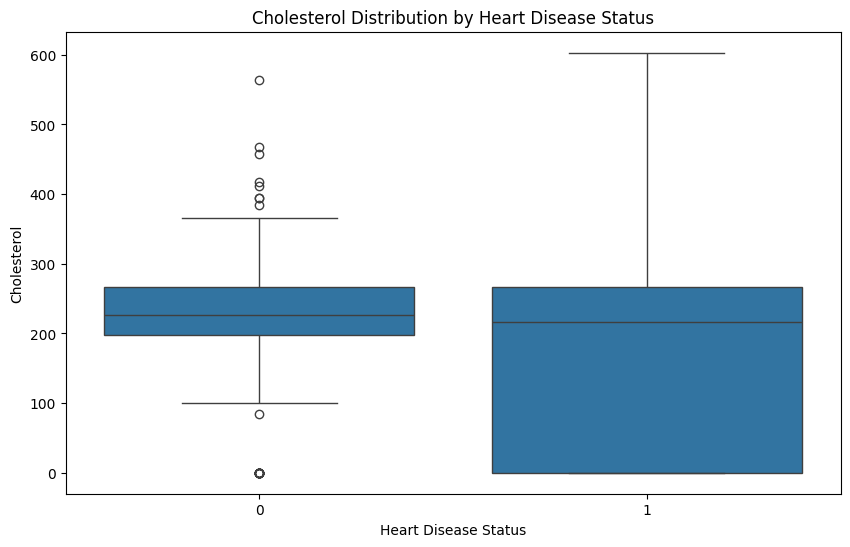

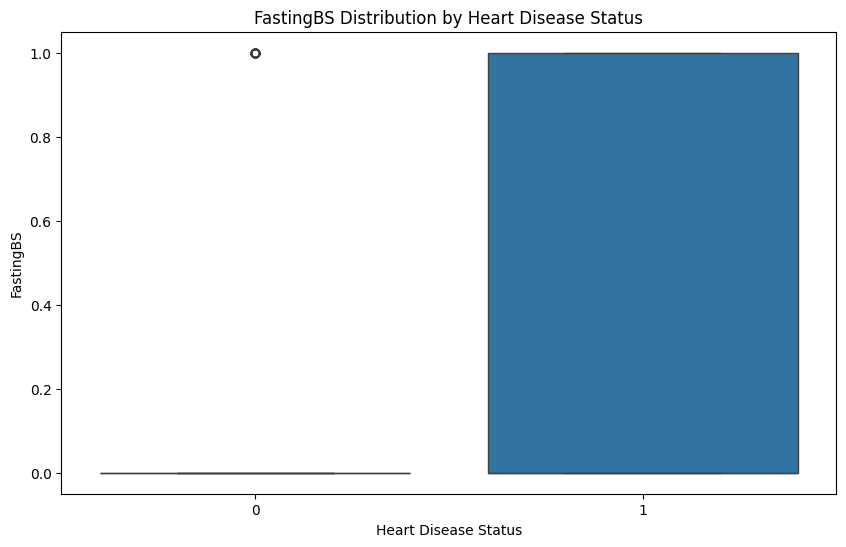

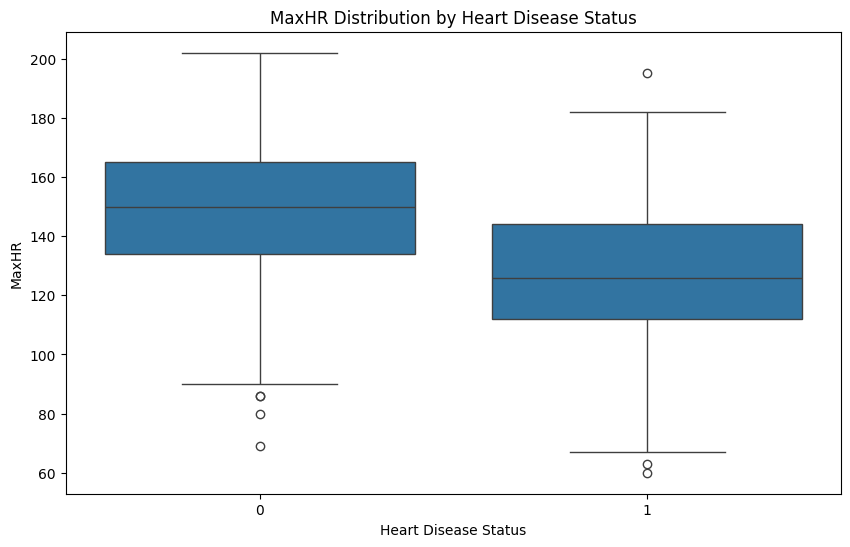

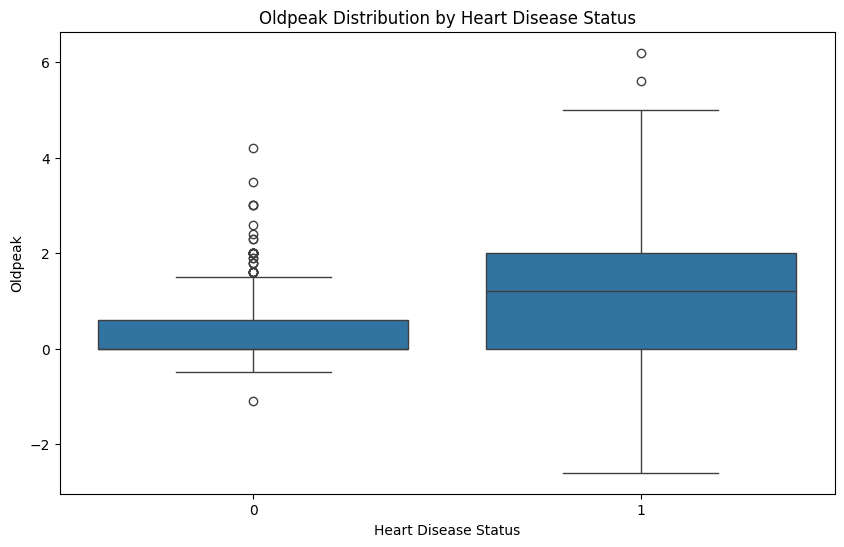

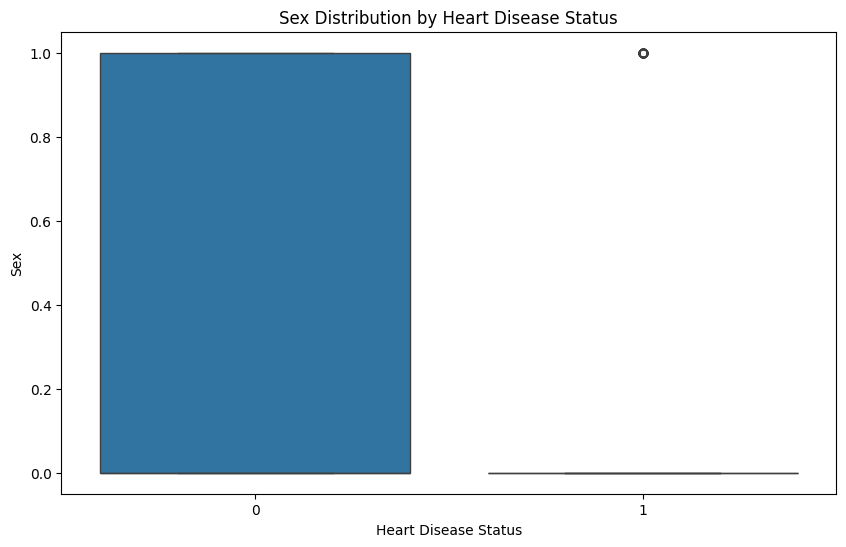

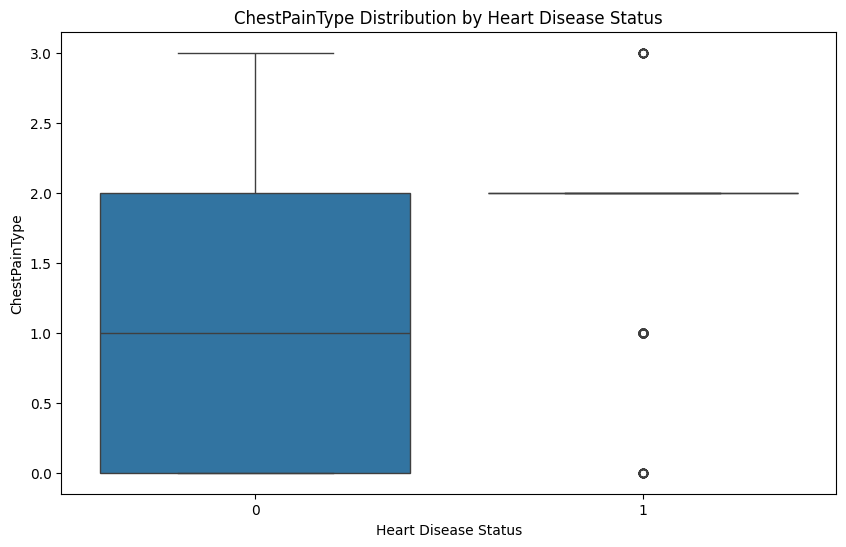

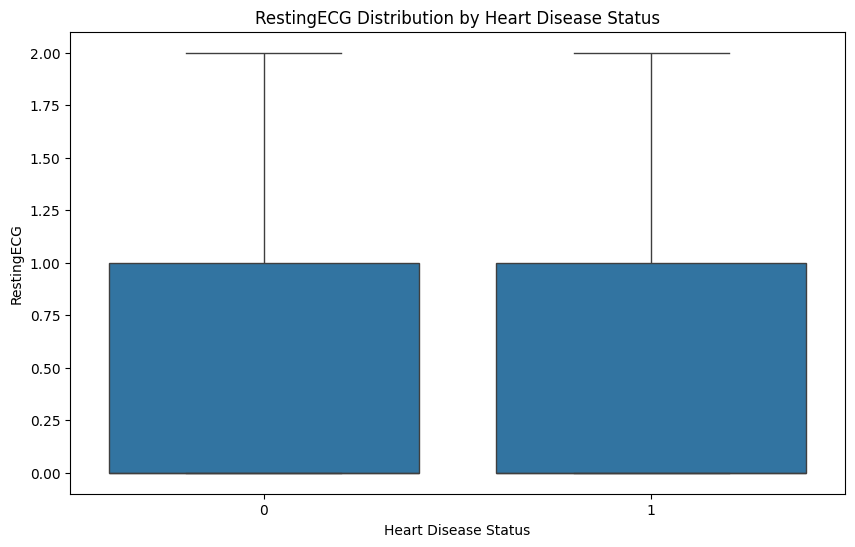

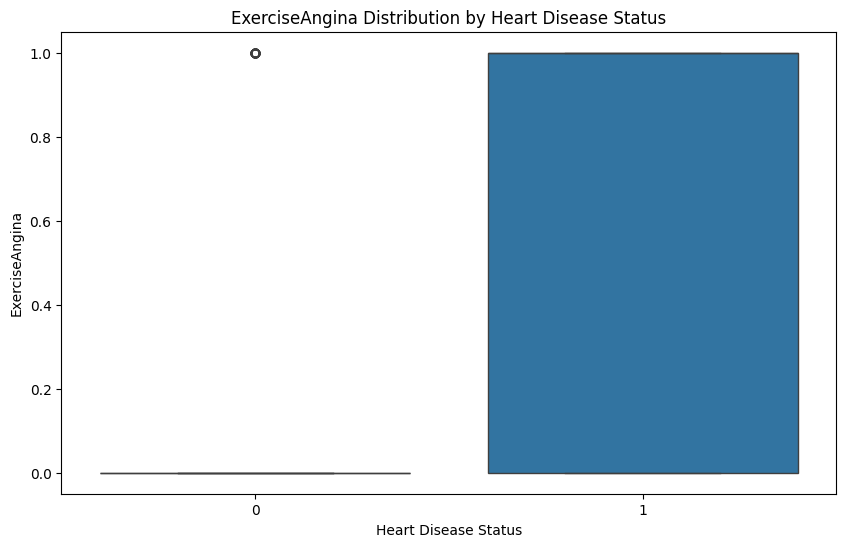

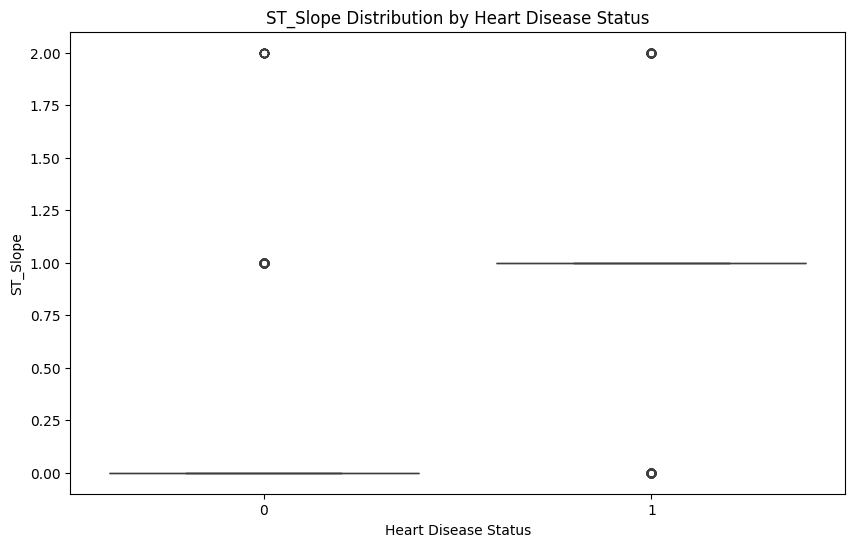

In [58]:
# Define the list of categorical columns to convert to numeric
df = pd.DataFrame(Heart_failure)
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for column in columns_to_convert:
    df[column] = pd.factorize(df[column])[0]

# Concatenate numeric features with converted categorical columns
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'] + columns_to_convert

# Plotting boxplot for numeric features
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='HeartDisease', y=feature, data=df)
    plt.title(f'{feature} Distribution by Heart Disease Status')
    plt.xlabel('Heart Disease Status')
    plt.ylabel(feature)
    plt.show()

Cholesterol Distribution:
- This dataset exhibits a right-skewed distribution for cholesterol.
- The median cholesterol level is around 225 mg/dL.
- There are a few outliers with cholesterol levels above 500 mg/dL.

Cholesterol and Heart Disease:
- People without heart disease have a median cholesterol level around 240.
- People with heart disease have a median cholesterol level around 230.
- People with heart disease exhibit a wider range of cholesterol levels.

Age and Heart Disease:
- Age is a significant factor in the prevalence of heart disease.
- For those with heart disease, the median age is higher compared to those without.

Resting Blood Pressure Insights:
- RestingBP is right-skewed.
- Most individuals have a RestingBP between 120 and 140.
- The median RestingBP is around 130.

MODEL CREATION

In [59]:
# Define categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Split the data into input features (X) and target variable (y)
X = Heart_failure.drop("HeartDisease", axis=1)
y = Heart_failure["HeartDisease"]


In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


This code ensures that both numeric and categorical features are appropriately handled aproviding clear insights into the data distributions.

In [61]:
# One-hot encode the categorical features with handle_unknown='ignore'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
# StandardScaler for numerical features
scaler = StandardScaler()

In [62]:
# Define numerical features
numerical_features = [col for col in X.columns if col not in categorical_features]



In [63]:
# Column transformer to apply one-hot encoding to the categorical features and scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features),
        ('num', scaler, numerical_features)
    ]
)


# Encode categorical variables using LabelEncoder
#Label encoding is used to convert categorical data into a numeric format that machine learning algorithms can process.
#Each unique category is assigned a unique integer value. However, label encoding is typically used when the categoricalvariable is ordinal.
#when you have only two categories (binary).
#For non-ordinal categorical variables with more than two categories, one-hot encoding is often preferred to avoid implying any ordinal relationship between categories.



In [64]:
le = LabelEncoder()
df1 = Heart_failure.copy(deep=True)
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [65]:
# Split data into features (X) and target (y)
features = df1[df1.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])].values
X = df1.drop('HeartDisease', axis=1)
y = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)



In [66]:
# Define model function
def model(classifier):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)

# Define model evaluation function
def model_evaluation(classifier):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    print("Confusion Matrix:")
    print(cm)
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, classifier.predict(x_test)))

In [67]:
# Logistic Regression 
classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2', solver='liblinear')
model(classifier_lr)
model_evaluation(classifier_lr)

Confusion Matrix:
[[68  9]
 [20 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [68]:
# Support Vector Classifier
classifier_svc = SVC(kernel='linear', C=0.1)
model(classifier_svc)
model_evaluation(classifier_svc)

Confusion Matrix:
[[68  9]
 [20 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [69]:
# Decision Tree Classifier
classifier_dt = DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)
model(classifier_dt)
model_evaluation(classifier_dt)

Confusion Matrix:
[[66 11]
 [13 94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [70]:
# Random Forest Classifier
classifier_rf = RandomForestClassifier(max_depth=4, random_state=0)
model(classifier_rf)
model_evaluation(classifier_rf)

Confusion Matrix:
[[68  9]
 [12 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [73]:
# Split the data into input features (X) and target variable (y)
X = Heart_failure.drop("HeartDisease", axis=1)
y = Heart_failure["HeartDisease"]

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('skewness_corrector', PowerTransformer(method='yeo-johnson', standardize=True))
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Create a pipeline that first transforms the data then fits the model
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define hyperparameter grid for KNN
param_grid = {
    'classifier__leaf_size': [1, 2, 3, 4, 5],
    'classifier__n_neighbors': [1, 3, 5, 7, 9],
    'classifier__p': [1, 2]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline_knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))



Best parameters: {'classifier__leaf_size': 1, 'classifier__n_neighbors': 9, 'classifier__p': 1}
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

